# 💳 Credit Card Default Prediction - Data Exploration

This notebook provides comprehensive exploratory data analysis (EDA) for credit card default prediction. We'll analyze customer demographics, payment behaviors, and financial patterns to understand factors that drive default risk.

## 🎯 Objectives
1. **Understand the dataset structure** with complete column dictionary
2. **Perform univariate, bivariate, and temporal analysis**
3. **Extract financial and behavioral insights**
4. **Identify patterns in payment behavior**
5. **Prepare insights for feature engineering**

## 📊 Dataset Overview
- **25,249 records** with **26 features**
- **Demographics**: Age, gender, education, marital status
- **Financial**: Credit limits, bill amounts, payment amounts
- **Behavioral**: Payment status history, derived ratios
- **Target**: Next month default prediction

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configure settings
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. 🧾 Column Dictionary

Understanding our dataset features is crucial for proper analysis. Here's the complete data dictionary for reference:

In [3]:
# Create Column Dictionary for Reference
column_dict = {
    'Column Name': [
        'Customer_ID', 'sex', 'education', 'marriage', 'age', 'LIMIT_BAL',
        'pay_0 to pay_6', 'Bill_amt1 to 6', 'pay_amt1 to 6', 
        'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default'
    ],
    'Description': [
        'Unique customer identifier',
        'Gender (1 = Male, 0 = Female)',
        'Education level: 1 = Graduate School, 2 = University, 3 = High School, 4 = Others',
        'Marital status: 1 = Married, 2 = Single, 3 = Others',
        'Age of the customer (in years)',
        'Credit limit granted to the customer (in currency units)',
        'Payment status for last 7 months: -2 = No bill, -1 = Fully paid, 0 = Minimum payment, 1+ = Overdue months',
        'Bill amount at end of months 1-6: Positive = owes money, Negative = overpaid, Zero = no activity',
        'Amount paid during months 1-6 to cover previous month\'s bill',
        'Average bill amount over 6 months',
        'Ratio of total payments to total bills over 6 months',
        'Target: 1 = Default next month, 0 = No Default'
    ]
}

# Display as DataFrame
column_df = pd.DataFrame(column_dict)
print("📚 Data Dictionary - Credit Card Default Prediction Dataset")
print("=" * 80)
display(column_df)

📚 Data Dictionary - Credit Card Default Prediction Dataset


,Column Name,Description
0,Customer_ID,Unique customer identifier
1,sex,"Gender (1 = Male, 0 = Female)"
2,education,"Education level: 1 = Graduate School, 2 = University, 3 = High School, 4 = Others"
3,marriage,"Marital status: 1 = Married, 2 = Single, 3 = Others"
4,age,Age of the customer (in years)
5,LIMIT_BAL,Credit limit granted to the customer (in currency units)
6,pay_0 to pay_6,"Payment status for last 7 months: -2 = No bill, -1 = Fully paid, 0 = Minimum payment, 1+ = Overdue months"
7,Bill_amt1 to 6,"Bill amount at end of months 1-6: Positive = owes money, Negative = overpaid, Zero = no activity"
8,pay_amt1 to 6,Amount paid during months 1-6 to cover previous month's bill
9,AVG_Bill_amt,Average bill amount over 6 months


## 2. 📥 Data Loading & Preprocessing

Let's load our training dataset and perform initial preprocessing steps including handling missing values and validating data quality.

In [4]:
# Load Training Dataset
df = pd.read_csv('../data/train.csv')

print("🔍 Dataset Overview")
print("=" * 50)
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n📊 First few rows:")
display(df.head())

print("\n📋 Dataset Info:")
print(df.info())

🔍 Dataset Overview
Shape: 25,247 rows × 27 columns
Memory usage: 5.20 MB

📊 First few rows:


,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,0,0,60323.86,60728.22,56472.74,28602.01,22191.53,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,-1,0,11157.67,0.00,0.88,0.65,2700.96,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,0,0,47930.96,48921.91,50034.26,50748.90,51902.56,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,0,0,91152.44,92916.01,90652.30,85295.56,80416.75,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,-2,-2,19666.40,999.04,3186.48,44932.48,2099.77,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0



📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  int64  
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25121 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3           25247 non-null  float64
 15  Bill_amt4           25247 non-null  

In [5]:
# Check for Missing Values
print("🔍 Missing Values Analysis")
print("=" * 50)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
}).sort_values('Missing Count', ascending=False)

print("Missing values summary:")
display(missing_summary[missing_summary['Missing Count'] > 0])

if missing_summary['Missing Count'].sum() == 0:
    print("✅ No missing values found in the dataset!")
else:
    print(f"⚠️ Total missing values: {missing_summary['Missing Count'].sum():,}")

# Basic Statistics
print("\n📈 Basic Statistical Summary:")
display(df.describe())

🔍 Missing Values Analysis
Missing values summary:


,Missing Count,Missing Percentage
age,126,0.499069


⚠️ Total missing values: 126

📈 Basic Statistical Summary:


,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
count,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25121.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000
mean,17640.000000,1.551907,0.604111,1.852101,168342.060443,35.438199,-0.042857,-0.159544,-0.190359,-0.241415,-0.282568,-0.307680,51170.887938,49092.268745,4.695839e+04,43134.911103,40218.976171,38806.221029,5718.624966,6.047352e+03,5288.910651,4865.960834,4906.766828,5270.499287,44859.647485,0.362962,0.190399
std,7288.325459,0.522629,0.489050,0.797379,129892.784807,9.174998,1.099315,1.173990,1.172636,1.146753,1.114213,1.130864,73250.806650,70695.367650,6.895687e+04,63846.205694,60389.690737,59182.792531,16806.842125,2.400962e+04,17851.879609,15979.116544,15860.726852,17960.816915,62819.226119,5.047206,0.392624
min,5017.000000,0.000000,0.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-56043.170000,-546.930000,0.000000
25%,11328.500000,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3601.340000,3017.155000,2.753275e+03,2319.615000,1770.625000,1241.710000,999.985000,9.219100e+02,399.990000,300.150000,262.365000,130.070000,4858.670000,0.040000,0.000000
50%,17640.000000,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22436.740000,21245.880000,2.008554e+04,19027.840000,18069.760000,17102.580000,2145.020000,2.026830e+03,1844.300000,1500.100000,1513.790000,1500.040000,21102.830000,0.090000,0.000000
75%,23951.500000,2.000000,1.000000,2.000000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67373.410000,64151.875000,6.022971e+04,54391.160000,50289.525000,49245.195000,5031.150000,5.000190e+03,4600.640000,4014.990000,4099.890000,4018.780000,57136.580000,0.590000,0.000000
max,30263.000000,3.000000,1.000000,6.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,7.000000,7.000000,8.000000,964511.160000,983931.050000,1.664089e+06,891585.580000,927172.770000,961663.620000,873551.980000,1.684259e+06,896040.150000,621000.080000,426529.180000,528666.150000,877313.830000,205.380000,1.000000


In [11]:
# 1. Calculate the mean of non-missing 'age' values
mean_age = df['age'].mean()

# 2. Find the closest actual age value to this mean
closest_age = df['age'].dropna().iloc[(df['age'].dropna() - mean_age).abs().argsort()[0]]

# 3. Fill missing values with this closest actual age
df['age'].fillna(closest_age, inplace=True)

# 4. Optional: Confirm no missing values remain
print("Missing values in age after filling:", df['age'].isnull().sum())
print(f"Filled with closest actual value to the mean ({mean_age:.2f}) → {closest_age}")


Missing values in age after filling: 0
Filled with closest actual value to the mean (35.44) → 35.0


In [12]:
# Validate Categorical Variables
print("🏷️ Categorical Variables Validation")
print("=" * 50)

# Check unique values for categorical columns
categorical_cols = ['sex', 'education', 'marriage', 'next_month_default']
for col in categorical_cols:
    if col in df.columns:
        unique_vals = sorted(df[col].unique())
        print(f"{col}: {unique_vals} (count: {len(unique_vals)})")

# Check payment status columns
pay_cols = [col for col in df.columns if col.startswith('pay_') and col not in ['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']]
print(f"\nPayment status columns found: {pay_cols}")

for col in pay_cols:
    unique_vals = sorted(df[col].unique())
    print(f"{col}: {unique_vals}")

# Check for data anomalies
print("\n🔍 Data Anomalies Check")
print("=" * 30)

# Negative credit limits
negative_limits = (df['LIMIT_BAL'] < 0).sum()
print(f"Negative credit limits: {negative_limits}")

# Extreme payment ratios
if 'PAY_TO_BILL_ratio' in df.columns:
    extreme_ratios = (df['PAY_TO_BILL_ratio'] > 5).sum()
    print(f"Extreme payment ratios (>5): {extreme_ratios}")

# Age outliers
age_outliers = ((df['age'] < 18) | (df['age'] > 100)).sum()
print(f"Age outliers (<18 or >100): {age_outliers}")

🏷️ Categorical Variables Validation
sex: [np.int64(0), np.int64(1)] (count: 2)
education: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)] (count: 7)
marriage: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)] (count: 4)
next_month_default: [np.int64(0), np.int64(1)] (count: 2)

Payment status columns found: ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
pay_0: [np.int64(-2), np.int64(-1), np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
pay_2: [np.int64(-2), np.int64(-1), np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
pay_3: [np.int64(-2), np.int64(-1), np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
pay_4: [np.int64(-2), np.int64(-1), np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.

## 3. 📊 Exploratory Data Analysis (EDA)

Now let's dive deep into understanding our data through comprehensive visualizations and statistical analysis.

### 3.1 Target Variable Analysis

🎯 Target Variable Distribution
No Default (0): 20,440 (80.96%)
Default (1): 4,807 (19.04%)
Default Rate: 19.04%


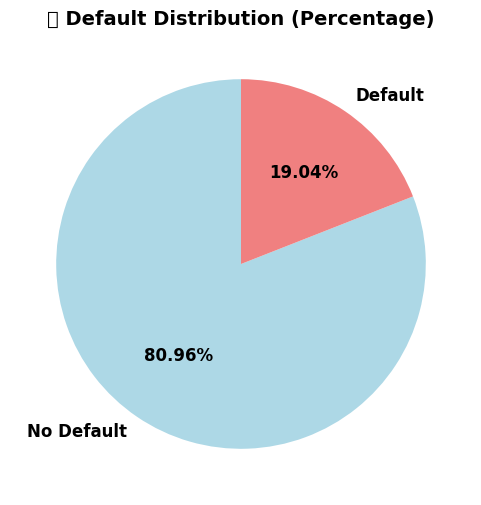

In [22]:
# Target Variable Analysis
target_col = 'next_month_default'
target_counts = df[target_col].value_counts()
target_pct = df[target_col].value_counts(normalize=True) * 100

print("🎯 Target Variable Distribution")
print("=" * 40)
print(f"No Default (0): {target_counts[0]:,} ({target_pct[0]:.2f}%)")
print(f"Default (1): {target_counts[1]:,} ({target_pct[1]:.2f}%)")
print(f"Default Rate: {target_pct[1]:.2f}%")

# Calculate target distribution
target_col = 'next_month_default'
target_counts = df[target_col].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(target_counts.values, 
        labels=['No Default', 'Default'], 
        autopct='%1.2f%%', 
        colors=['lightblue', 'lightcoral'], 
        startangle=90,
        textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title('📊 Default Distribution (Percentage)', fontweight='bold', fontsize=14)
plt.show()


### 3.2 Univariate Analysis - Continuous Variables

🔍 Enhanced Continuous Variables Analysis


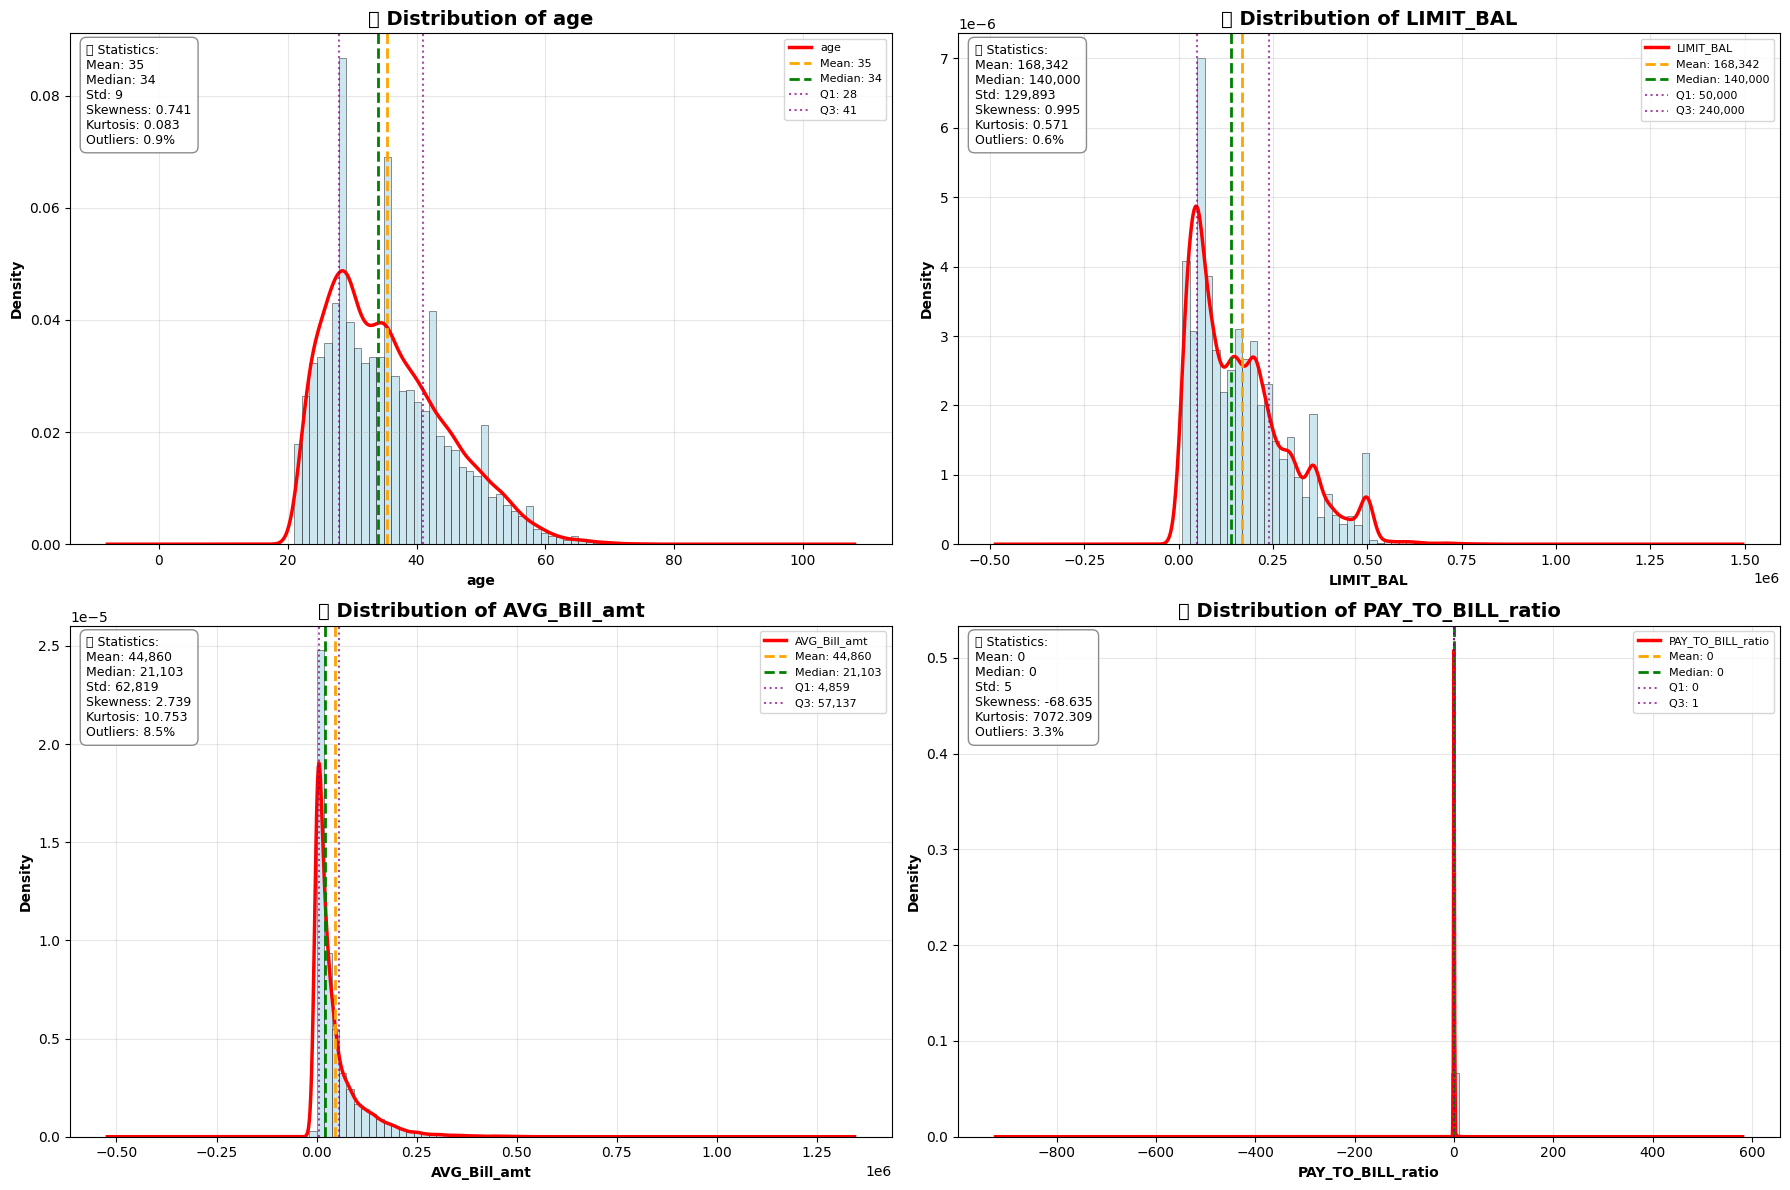


📊 Comprehensive Statistics for Continuous Variables


,Count,Mean,Median,Std,Min,Max,Q1,Q3,IQR,Skewness,Kurtosis,Outliers_Count,Outliers_Pct
age,25247.0,35.44,34.00,9.15,21.00,79.00,28.00,41.00,13.00,0.74,0.08,217.0,0.86
LIMIT_BAL,25247.0,168342.06,140000.00,129892.78,10000.00,1000000.00,50000.00,240000.00,190000.00,0.99,0.57,148.0,0.59
AVG_Bill_amt,25247.0,44859.65,21102.83,62819.23,-56043.17,877313.83,4858.67,57136.58,52277.91,2.74,10.75,2158.0,8.55
PAY_TO_BILL_ratio,25247.0,0.36,0.09,5.05,-546.93,205.38,0.04,0.59,0.55,-68.63,7072.31,829.0,3.28



🔍 Distribution Analysis & Insights:

📈 AGE:
   • Distribution: right-skewed (positive skew)
   • Tail behavior: normal-tailed (mesokurtic)
   • Outliers: LOW outlier presence (0.9%)
   • Range: 21 to 79
   • Coefficient of Variation: 25.8%

📈 LIMIT_BAL:
   • Distribution: right-skewed (positive skew)
   • Tail behavior: normal-tailed (mesokurtic)
   • Outliers: LOW outlier presence (0.6%)
   • Range: 10,000 to 1,000,000
   • Coefficient of Variation: 77.2%

📈 AVG_BILL_AMT:
   • Distribution: right-skewed (positive skew)
   • Tail behavior: heavy-tailed (leptokurtic)
   • Outliers: MODERATE outlier presence (8.6%)
   • Range: -56,043 to 877,314
   • Coefficient of Variation: 140.0%

📈 PAY_TO_BILL_RATIO:
   • Distribution: left-skewed (negative skew)
   • Tail behavior: heavy-tailed (leptokurtic)
   • Outliers: LOW outlier presence (3.3%)
   • Range: -547 to 205
   • Coefficient of Variation: 1390.6%

🔗 Correlation Matrix for Continuous Variables:


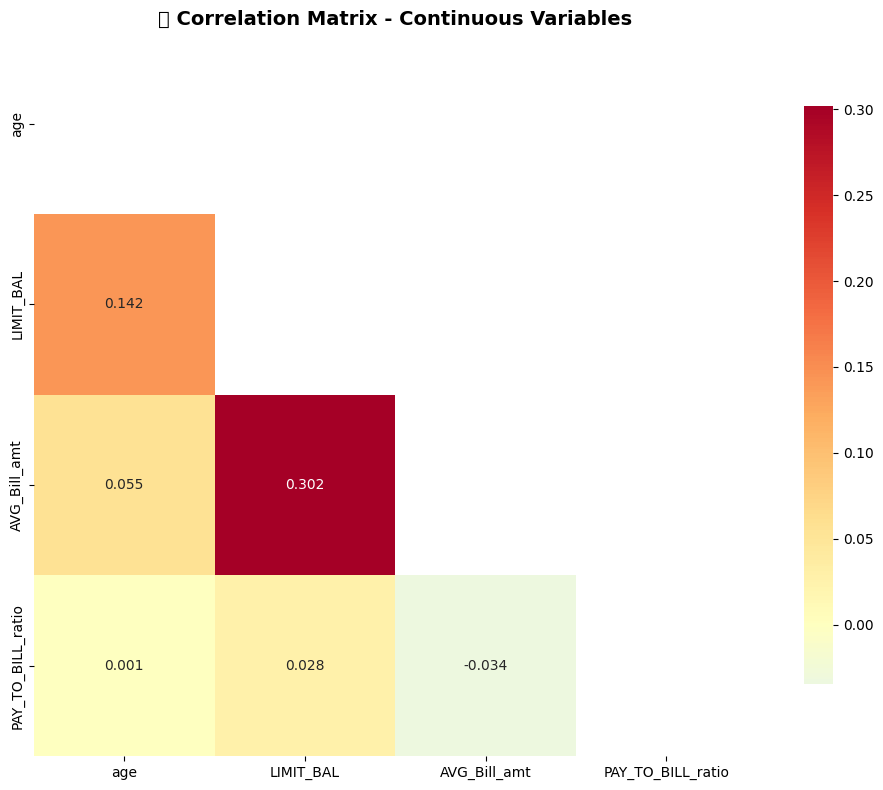


🎯 Strong Correlations (|r| > 0.3):
----------------------------------------
   • LIMIT_BAL ↔ AVG_Bill_amt: 0.302

✅ Analysis completed for 4 continuous variables


In [24]:
# Enhanced analysis of key continuous variables
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import seaborn as sns

continuous_vars = ['age', 'LIMIT_BAL', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio']

# Create enhanced subplots for distributions
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.ravel()

print("🔍 Enhanced Continuous Variables Analysis")
print("=" * 80)

for i, var in enumerate(continuous_vars):
    if var in df.columns:
        # Calculate enhanced statistics
        data = df[var].dropna()
        mean_val = data.mean()
        median_val = data.median()
        std_val = data.std()
        skewness = stats.skew(data)
        kurtosis = stats.kurtosis(data)
        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        
        # Outlier detection using IQR method
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = data[(data < lower_bound) | (data > upper_bound)]
        outlier_percentage = (len(outliers) / len(data)) * 100
        
        # Create enhanced visualization
        # Histogram with KDE and quartiles
        data.hist(bins=50, alpha=0.6, ax=axes[i], density=True, color='lightblue', edgecolor='black', linewidth=0.5)
        data.plot.kde(ax=axes[i], color='red', linewidth=2.5)
        
        # Add vertical lines for key statistics
        axes[i].axvline(mean_val, color='orange', linestyle='--', linewidth=2, label=f'Mean: {mean_val:,.0f}')
        axes[i].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:,.0f}')
        axes[i].axvline(q1, color='purple', linestyle=':', alpha=0.7, label=f'Q1: {q1:,.0f}')
        axes[i].axvline(q3, color='purple', linestyle=':', alpha=0.7, label=f'Q3: {q3:,.0f}')
        
        # Styling
        axes[i].set_title(f'📈 Distribution of {var}', fontweight='bold', fontsize=14)
        axes[i].set_xlabel(var, fontweight='bold')
        axes[i].set_ylabel('Density', fontweight='bold')
        axes[i].grid(True, alpha=0.3)
        axes[i].legend(loc='upper right', fontsize=8)
        
        # Enhanced statistics text box
        stats_text = (f'📊 Statistics:\n'
                     f'Mean: {mean_val:,.0f}\n'
                     f'Median: {median_val:,.0f}\n'
                     f'Std: {std_val:,.0f}\n'
                     f'Skewness: {skewness:.3f}\n'
                     f'Kurtosis: {kurtosis:.3f}\n'
                     f'Outliers: {outlier_percentage:.1f}%')
        
        axes[i].text(0.02, 0.98, stats_text, transform=axes[i].transAxes, 
                    verticalalignment='top', fontsize=9,
                    bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.9, edgecolor='gray'))

plt.tight_layout()
plt.show()

# Enhanced detailed statistics table
print("\n📊 Comprehensive Statistics for Continuous Variables")
print("=" * 80)

# Create enhanced statistics dataframe
enhanced_stats = pd.DataFrame(index=continuous_vars)
for var in continuous_vars:
    if var in df.columns:
        data = df[var].dropna()
        enhanced_stats.loc[var, 'Count'] = len(data)
        enhanced_stats.loc[var, 'Mean'] = data.mean()
        enhanced_stats.loc[var, 'Median'] = data.median()
        enhanced_stats.loc[var, 'Std'] = data.std()
        enhanced_stats.loc[var, 'Min'] = data.min()
        enhanced_stats.loc[var, 'Max'] = data.max()
        enhanced_stats.loc[var, 'Q1'] = data.quantile(0.25)
        enhanced_stats.loc[var, 'Q3'] = data.quantile(0.75)
        enhanced_stats.loc[var, 'IQR'] = data.quantile(0.75) - data.quantile(0.25)
        enhanced_stats.loc[var, 'Skewness'] = stats.skew(data)
        enhanced_stats.loc[var, 'Kurtosis'] = stats.kurtosis(data)
        
        # Outlier analysis
        q1, q3 = data.quantile(0.25), data.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = data[(data < lower_bound) | (data > upper_bound)]
        enhanced_stats.loc[var, 'Outliers_Count'] = len(outliers)
        enhanced_stats.loc[var, 'Outliers_Pct'] = (len(outliers) / len(data)) * 100

# Round for better display
enhanced_stats = enhanced_stats.round(2)
display(enhanced_stats)

# Distribution interpretation
print("\n🔍 Distribution Analysis & Insights:")
print("=" * 50)

for var in continuous_vars:
    if var in df.columns:
        data = df[var].dropna()
        skewness = stats.skew(data)
        kurtosis = stats.kurtosis(data)
        
        print(f"\n📈 {var.upper()}:")
        
        # Skewness interpretation
        if abs(skewness) < 0.5:
            skew_desc = "approximately symmetric"
        elif skewness > 0.5:
            skew_desc = "right-skewed (positive skew)"
        else:
            skew_desc = "left-skewed (negative skew)"
        
        # Kurtosis interpretation
        if kurtosis > 3:
            kurt_desc = "heavy-tailed (leptokurtic)"
        elif kurtosis < -1:
            kurt_desc = "light-tailed (platykurtic)"
        else:
            kurt_desc = "normal-tailed (mesokurtic)"
        
        # Outlier assessment
        outlier_pct = enhanced_stats.loc[var, 'Outliers_Pct']
        if outlier_pct > 10:
            outlier_desc = "HIGH outlier presence - consider investigation"
        elif outlier_pct > 5:
            outlier_desc = "MODERATE outlier presence"
        else:
            outlier_desc = "LOW outlier presence"
        
        print(f"   • Distribution: {skew_desc}")
        print(f"   • Tail behavior: {kurt_desc}")
        print(f"   • Outliers: {outlier_desc} ({outlier_pct:.1f}%)")
        print(f"   • Range: {data.min():,.0f} to {data.max():,.0f}")
        print(f"   • Coefficient of Variation: {(data.std()/data.mean()*100):.1f}%")

# Correlation analysis
print(f"\n🔗 Correlation Matrix for Continuous Variables:")
print("=" * 50)
correlation_matrix = df[continuous_vars].corr()
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, fmt='.3f', cbar_kws={"shrink": .8}, mask=mask)
plt.title('🔗 Correlation Matrix - Continuous Variables', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

# Strong correlations identification
print("\n🎯 Strong Correlations (|r| > 0.3):")
print("-" * 40)
strong_corr = []
for i in range(len(continuous_vars)):
    for j in range(i+1, len(continuous_vars)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.3:
            strong_corr.append((continuous_vars[i], continuous_vars[j], corr_val))
            print(f"   • {continuous_vars[i]} ↔ {continuous_vars[j]}: {corr_val:.3f}")

if not strong_corr:
    print("   • No strong correlations found (|r| > 0.3)")

print(f"\n✅ Analysis completed for {len(continuous_vars)} continuous variables")

### 3.3 Univariate Analysis - Categorical Variables

🔍 Enhanced Categorical Variables Analysis


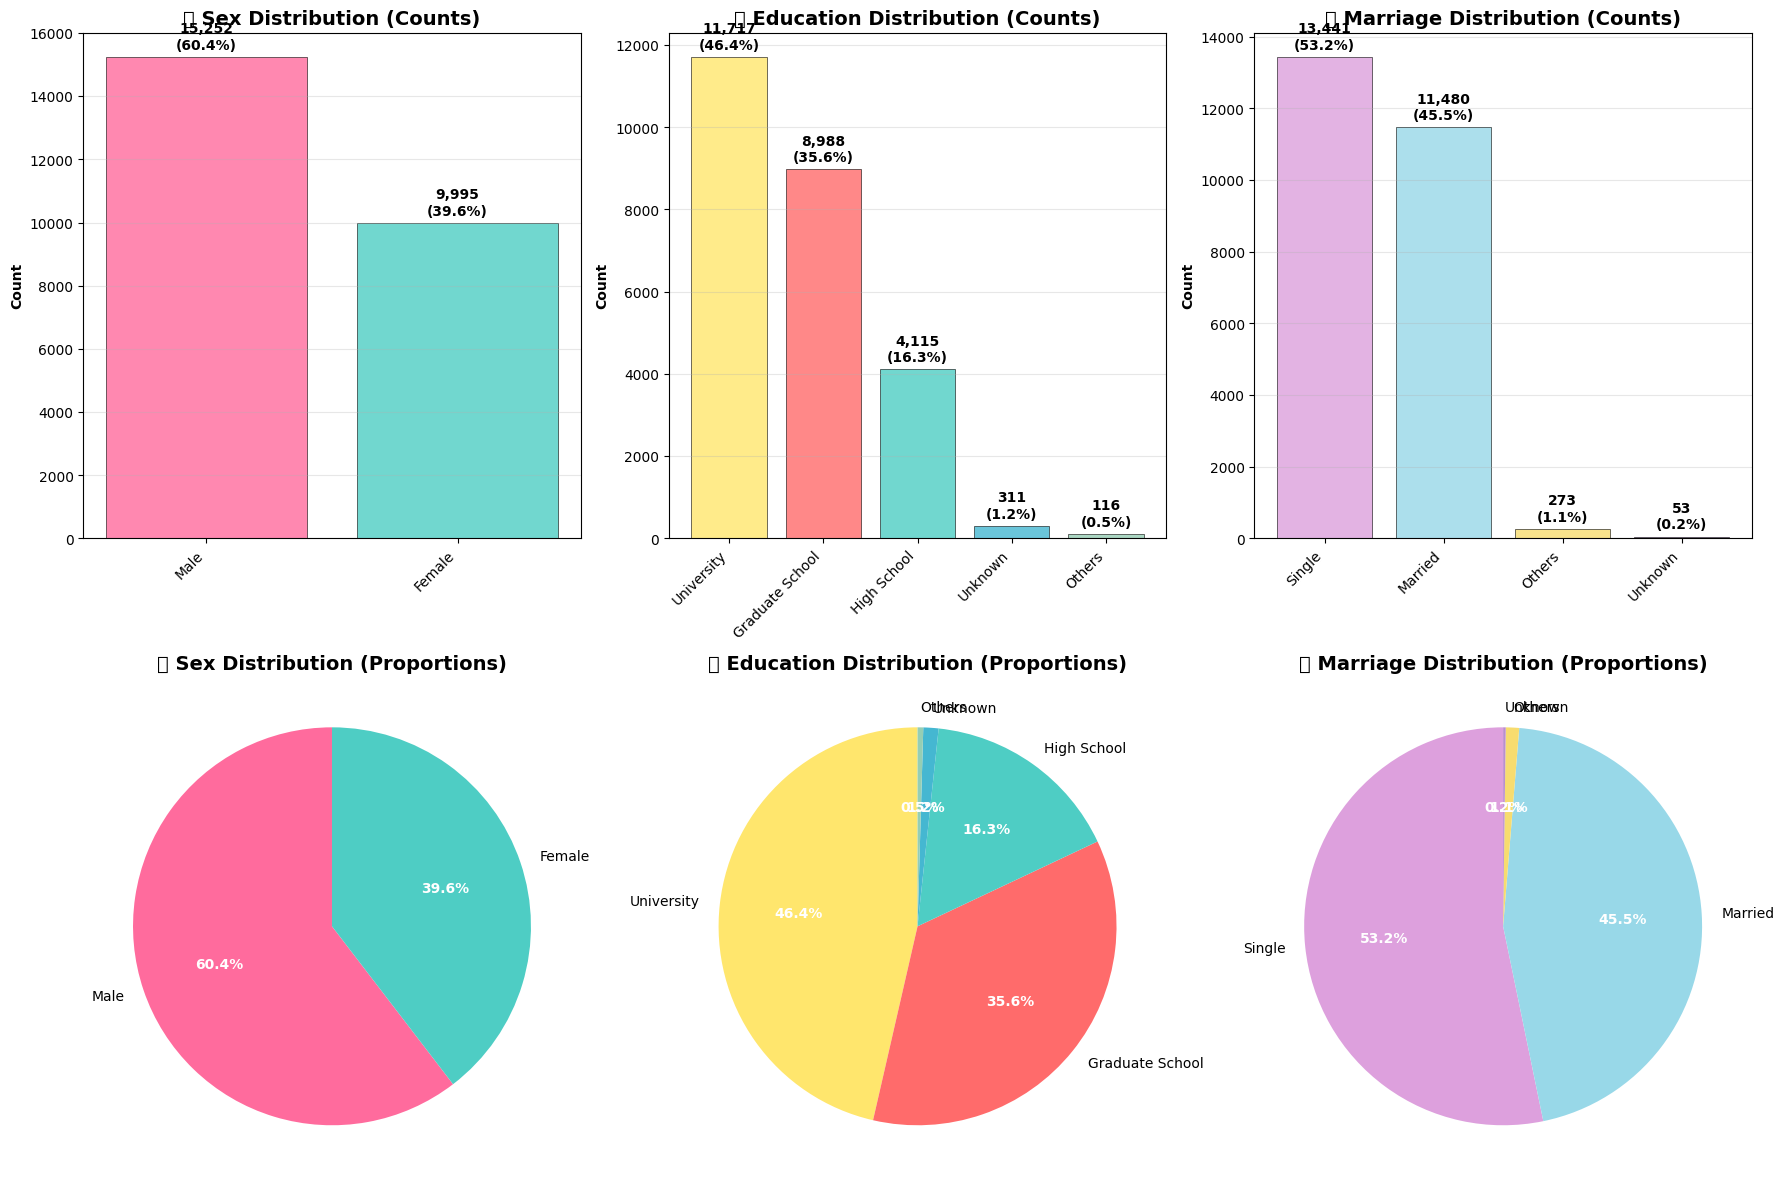


📊 Detailed Categorical Variables Summary


,Unique_Categories,Most_Common,Most_Common_Pct,Least_Common,Least_Common_Pct,Missing_Values
sex,2,Male,60.4%,Female,39.6%,0
education,5,University,46.4%,Others,0.5%,0
marriage,4,Single,53.2%,Unknown,0.2%,0



🔍 Detailed Category Breakdown & Insights

📈 SEX:
------------------------------
  • Male: 15,252 (60.4%)
  • Female: 9,995 (39.6%)
  💡 Insight: HIGHLY SKEWED - Male dominates (60.4%)

📈 EDUCATION:
------------------------------
  • University: 11,717 (46.4%)
  • Graduate School: 8,988 (35.6%)
  • High School: 4,115 (16.3%)
  • Unknown: 311 (1.2%)
  • Others: 116 (0.5%)
  💡 Insight: MODERATELY SKEWED towards University (46.4%)

📈 MARRIAGE:
------------------------------
  • Single: 13,441 (53.2%)
  • Married: 11,480 (45.5%)
  • Others: 273 (1.1%)
  • Unknown: 53 (0.2%)
  💡 Insight: MODERATELY SKEWED towards Single (53.2%)

✅ Enhanced categorical analysis completed for 3 variables


In [27]:
# Enhanced Categorical Variables Analysis
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

categorical_vars = ['sex', 'education', 'marriage']

# Enhanced mappings with complete coverage
mappings = {
    'sex': {0: 'Female', 1: 'Male'},
    'education': {
        0: 'Unknown', 1: 'Graduate School', 2: 'University', 
        3: 'High School', 4: 'Others', 5: 'Unknown', 6: 'Unknown'
    },
    'marriage': {
        0: 'Unknown', 1: 'Married', 2: 'Single', 3: 'Others'
    }
}

# Consolidate unknown categories for cleaner analysis
def clean_categorical_data(df, var, mapping):
    """Clean and consolidate categorical data"""
    cleaned = df[var].copy()
    
    if var == 'education':
        # Consolidate unknown categories (0, 5, 6) into one
        cleaned = cleaned.replace({0: 'Unknown', 5: 'Unknown', 6: 'Unknown'})
        cleaned = cleaned.replace({1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others'})
    elif var == 'marriage':
        # Consolidate unknown categories
        cleaned = cleaned.replace({0: 'Unknown'})
        cleaned = cleaned.replace({1: 'Married', 2: 'Single', 3: 'Others'})
    else:
        # For sex, use direct mapping
        cleaned = cleaned.map(mapping)
    
    return cleaned

print("🔍 Enhanced Categorical Variables Analysis")
print("=" * 80)

# Create enhanced visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# Color palettes for consistency
color_palettes = {
    'sex': ['#FF6B9D', '#4ECDC4'],
    'education': ['#FFE66D', '#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'],
    'marriage': ['#DDA0DD', '#98D8E8', '#F7DC6F', '#BB8FCE']
}

cleaned_data = {}
for i, var in enumerate(categorical_vars):
    if var in df.columns:
        # Clean the data
        cleaned_data[var] = clean_categorical_data(df, var, mappings[var])
        
        # Get value counts and proportions
        counts = cleaned_data[var].value_counts()
        proportions = cleaned_data[var].value_counts(normalize=True)
        
        # Plot 1: Count distribution
        colors = color_palettes[var][:len(counts)]
        bars = axes[i].bar(range(len(counts)), counts.values, color=colors, 
                          edgecolor='black', linewidth=0.5, alpha=0.8)
        
        axes[i].set_title(f'📊 {var.title()} Distribution (Counts)', fontweight='bold', fontsize=14)
        axes[i].set_ylabel('Count', fontweight='bold')
        axes[i].set_xticks(range(len(counts)))
        axes[i].set_xticklabels(counts.index, rotation=45, ha='right')
        axes[i].grid(True, alpha=0.3, axis='y')
        
        # Add count and percentage labels
        for j, (bar, count, prop) in enumerate(zip(bars, counts.values, proportions.values)):
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width()/2., height + max(counts.values)*0.01,
                        f'{count:,}\n({prop*100:.1f}%)',
                        ha='center', va='bottom', fontweight='bold', fontsize=10)
        
        # Plot 2: Pie chart for proportions
        wedges, texts, autotexts = axes[i+3].pie(counts.values, labels=counts.index, 
                                                 autopct='%1.1f%%', colors=colors,
                                                 startangle=90, textprops={'fontsize': 10})
        axes[i+3].set_title(f'🥧 {var.title()} Distribution (Proportions)', fontweight='bold', fontsize=14)
        
        # Enhance pie chart text
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

# Enhanced statistical summary
print("\n📊 Detailed Categorical Variables Summary")
print("=" * 80)

summary_stats = pd.DataFrame(index=categorical_vars, 
                           columns=['Unique_Categories', 'Most_Common', 'Most_Common_Pct', 
                                  'Least_Common', 'Least_Common_Pct', 'Missing_Values'])

for var in categorical_vars:
    if var in df.columns:
        cleaned = cleaned_data[var]
        counts = cleaned.value_counts()
        proportions = cleaned.value_counts(normalize=True)
        
        summary_stats.loc[var, 'Unique_Categories'] = len(counts)
        summary_stats.loc[var, 'Most_Common'] = counts.index[0]
        summary_stats.loc[var, 'Most_Common_Pct'] = f"{proportions.iloc[0]*100:.1f}%"
        summary_stats.loc[var, 'Least_Common'] = counts.index[-1]
        summary_stats.loc[var, 'Least_Common_Pct'] = f"{proportions.iloc[-1]*100:.1f}%"
        summary_stats.loc[var, 'Missing_Values'] = df[var].isna().sum()

display(summary_stats)

# Detailed proportions with insights
print("\n🔍 Detailed Category Breakdown & Insights")
print("=" * 60)

for var in categorical_vars:
    if var in df.columns:
        cleaned = cleaned_data[var]
        counts = cleaned.value_counts()
        proportions = cleaned.value_counts(normalize=True)
        
        print(f"\n📈 {var.upper()}:")
        print("-" * 30)
        
        for category, count in counts.items():
            pct = proportions[category] * 100
            print(f"  • {category}: {count:,} ({pct:.1f}%)")
        
        # Add insights
        dominant_category = counts.index[0]
        dominant_pct = proportions.iloc[0] * 100
        
        if dominant_pct > 60:
            insight = f"HIGHLY SKEWED - {dominant_category} dominates ({dominant_pct:.1f}%)"
        elif dominant_pct > 40:
            insight = f"MODERATELY SKEWED towards {dominant_category} ({dominant_pct:.1f}%)"
        else:
            insight = f"RELATIVELY BALANCED distribution"
        
        print(f"  💡 Insight: {insight}")

# Association with target variable (if exists)
if 'default.payment.next.month' in df.columns:
    target_col = 'default.payment.next.month'
    
    print(f"\n🎯 Association with Target Variable ({target_col})")
    print("=" * 70)
    
    # Chi-square tests and cramér's V
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    chi_square_results = {}
    
    for i, var in enumerate(categorical_vars):
        if var in df.columns:
            cleaned = cleaned_data[var]
            
            # Create contingency table
            contingency_table = pd.crosstab(cleaned, df[target_col])
            
            # Chi-square test
            chi2, p_value, dof, expected = chi2_contingency(contingency_table)
            
            # Cramér's V (measure of association strength)
            n = contingency_table.sum().sum()
            cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
            
            chi_square_results[var] = {
                'chi2': chi2, 'p_value': p_value, 'cramers_v': cramers_v
            }
            
            # Calculate default rates by category
            default_rates = df.groupby(cleaned)[target_col].agg(['count', 'sum', 'mean']).reset_index()
            default_rates.columns = ['Category', 'Total', 'Defaults', 'Default_Rate']
            
            # Visualization
            colors = color_palettes[var][:len(default_rates)]
            bars = axes[i].bar(range(len(default_rates)), default_rates['Default_Rate'] * 100, 
                              color=colors, edgecolor='black', linewidth=0.5, alpha=0.8)
            
            axes[i].set_title(f'📊 Default Rate by {var.title()}\n(Cramér\'s V: {cramers_v:.3f})', 
                             fontweight='bold', fontsize=12)
            axes[i].set_ylabel('Default Rate (%)', fontweight='bold')
            axes[i].set_xticks(range(len(default_rates)))
            axes[i].set_xticklabels(default_rates['Category'], rotation=45, ha='right')
            axes[i].grid(True, alpha=0.3, axis='y')
            
            # Add percentage labels
            for j, (bar, rate) in enumerate(zip(bars, default_rates['Default_Rate'])):
                height = bar.get_height()
                axes[i].text(bar.get_x() + bar.get_width()/2., height + 0.2,
                            f'{rate*100:.1f}%',
                            ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # Statistical significance summary
    print("\n📊 Statistical Association Tests:")
    print("-" * 50)
    
    for var, results in chi_square_results.items():
        significance = "SIGNIFICANT" if results['p_value'] < 0.05 else "NOT SIGNIFICANT"
        
        if results['cramers_v'] < 0.1:
            strength = "WEAK"
        elif results['cramers_v'] < 0.3:
            strength = "MODERATE"
        else:
            strength = "STRONG"
        
        print(f"  • {var.upper()}:")
        print(f"    - Chi-square: {results['chi2']:.2f}")
        print(f"    - P-value: {results['p_value']:.4f} ({significance})")
        print(f"    - Cramér's V: {results['cramers_v']:.3f} ({strength} association)")

print(f"\n✅ Enhanced categorical analysis completed for {len(categorical_vars)} variables")

### 3.4 Bivariate Analysis - Default Rates by Categories

🎯 Enhanced Default Rate Analysis by Categorical Variables


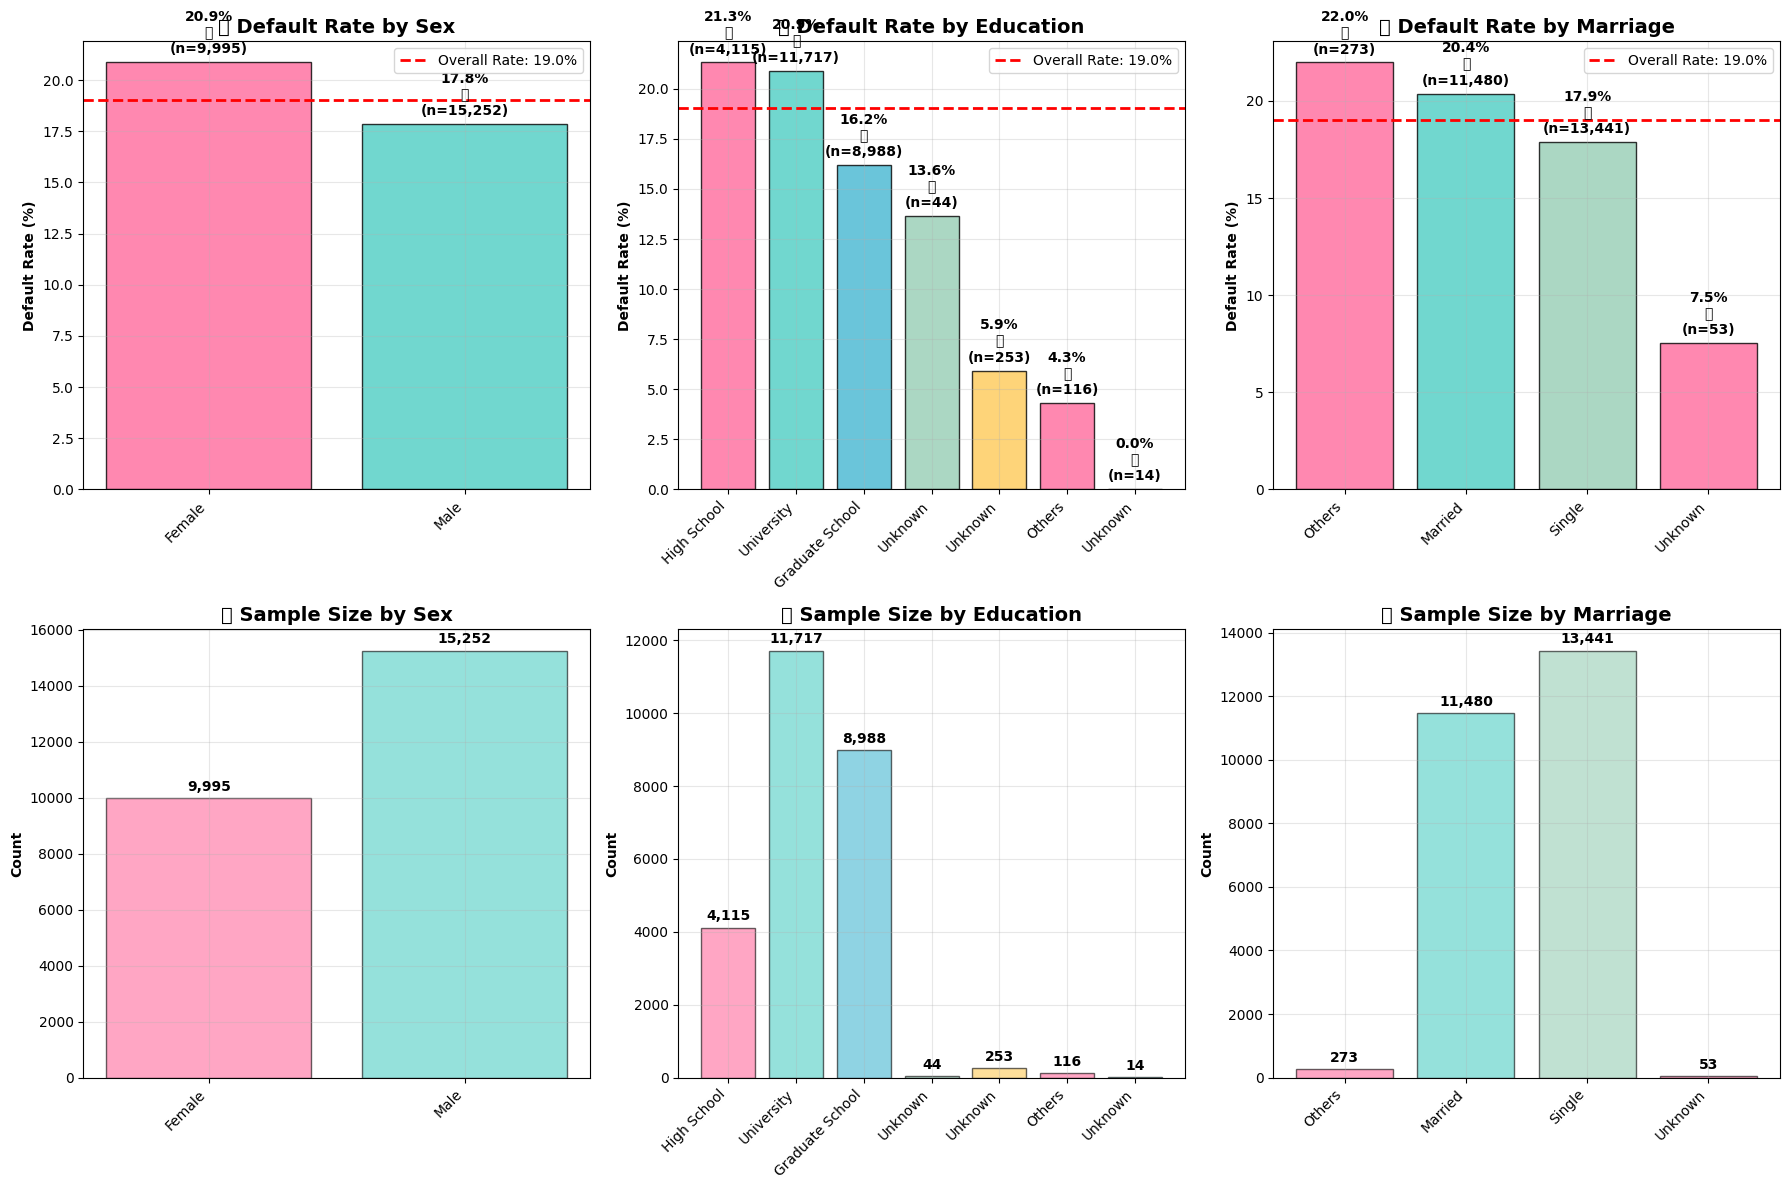


📈 Statistical Significance Tests

🔍 SEX:
   • Chi-square: 35.379
   • P-value: 0.000000 (SIGNIFICANT)
   • Cramér's V: 0.037 (NEGLIGIBLE effect)

🔍 EDUCATION:
   • Chi-square: 136.815
   • P-value: 0.000000 (SIGNIFICANT)
   • Cramér's V: 0.074 (NEGLIGIBLE effect)

🔍 MARRIAGE:
   • Chi-square: 30.955
   • P-value: 0.000001 (SIGNIFICANT)
   • Cramér's V: 0.035 (NEGLIGIBLE effect)

🎯 Detailed Default Rate Analysis

📊 SEX Analysis:
----------------------------------------
   • Female: 20.9% default rate
     - 2,085 defaults out of 9,995 customers
     - Relative Risk: 1.10x (🟡 MODERATE RISK)
     - Contribution: 43.4% of all defaults
   • Male: 17.8% default rate
     - 2,722 defaults out of 15,252 customers
     - Relative Risk: 0.94x (🟡 MODERATE RISK)
     - Contribution: 56.6% of all defaults
   ⚠️  Statistically significant association with default (p < 0.05)

📊 EDUCATION Analysis:
----------------------------------------
   • High School: 21.3% default rate
     - 877 defaults out o

In [30]:
# Enhanced default rates analysis by categorical variables
from scipy.stats import chi2_contingency, fisher_exact
import warnings
warnings.filterwarnings('ignore')

print("🎯 Enhanced Default Rate Analysis by Categorical Variables")
print("=" * 80)

# Create enhanced visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# Color schemes for better visualization
color_schemes = {
    'sex': ['#FF6B9D', '#4ECDC4'],
    'education': ['#FF6B9D', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57'],
    'marriage': ['#FF6B9D', '#4ECDC4', '#96CEB4']
}

overall_default_rate = df[target_col].mean() * 100

for i, var in enumerate(categorical_vars):
    if var in df.columns:
        # Calculate comprehensive default rates
        default_analysis = df.groupby(var)[target_col].agg(['count', 'sum', 'mean']).reset_index()
        default_analysis['labels'] = default_analysis[var].map(lambda x: mappings[var].get(x, f'Unknown ({x})'))
        default_analysis['default_rate_pct'] = default_analysis['mean'] * 100
        default_analysis['non_default'] = default_analysis['count'] - default_analysis['sum']
        default_analysis['relative_risk'] = default_analysis['mean'] / df[target_col].mean()
        
        # Sort by default rate for better visualization
        default_analysis = default_analysis.sort_values('default_rate_pct', ascending=False)
        
        # First subplot: Default rates
        colors = color_schemes.get(var, plt.cm.Set3(np.linspace(0, 1, len(default_analysis))))
        bars = axes[i].bar(range(len(default_analysis)), default_analysis['default_rate_pct'], 
                          color=colors, alpha=0.8, edgecolor='black', linewidth=1)
        
        # Add overall default rate line
        axes[i].axhline(y=overall_default_rate, color='red', linestyle='--', linewidth=2, 
                       label=f'Overall Rate: {overall_default_rate:.1f}%')
        
        axes[i].set_title(f'🎯 Default Rate by {var.title()}', fontweight='bold', fontsize=14)
        axes[i].set_ylabel('Default Rate (%)', fontweight='bold')
        axes[i].set_xticks(range(len(default_analysis)))
        axes[i].set_xticklabels(default_analysis['labels'], rotation=45, ha='right')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
        
        # Enhanced labels on bars
        for j, (bar, row) in enumerate(zip(bars, default_analysis.itertuples())):
            height = bar.get_height()
            # Relative risk indicator
            risk_indicator = "🔴" if row.relative_risk > 1.2 else "🟡" if row.relative_risk > 0.8 else "🟢"
            
            axes[i].text(bar.get_x() + bar.get_width()/2., height + 0.3,
                        f'{row.default_rate_pct:.1f}%\n{risk_indicator}\n(n={row.count:,})',
                        ha='center', va='bottom', fontweight='bold', fontsize=10)
        
        # Second subplot: Count distribution
        ax_count = axes[i + 3]
        bars_count = ax_count.bar(range(len(default_analysis)), default_analysis['count'], 
                                 color=colors, alpha=0.6, edgecolor='black', linewidth=1)
        
        ax_count.set_title(f'📊 Sample Size by {var.title()}', fontweight='bold', fontsize=14)
        ax_count.set_ylabel('Count', fontweight='bold')
        ax_count.set_xticks(range(len(default_analysis)))
        ax_count.set_xticklabels(default_analysis['labels'], rotation=45, ha='right')
        ax_count.grid(True, alpha=0.3)
        
        # Add count labels
        for bar, count in zip(bars_count, default_analysis['count']):
            height = bar.get_height()
            ax_count.text(bar.get_x() + bar.get_width()/2., height + max(default_analysis['count'])*0.01,
                         f'{count:,}',
                         ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

# Statistical significance testing
print("\n📈 Statistical Significance Tests")
print("=" * 60)

significance_results = {}
for var in categorical_vars:
    if var in df.columns:
        # Create contingency table
        contingency_table = pd.crosstab(df[var], df[target_col])
        
        # Chi-square test
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        
        # Effect size (Cramér's V)
        n = contingency_table.sum().sum()
        cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
        
        significance_results[var] = {
            'chi2': chi2,
            'p_value': p_value,
            'cramers_v': cramers_v,
            'significant': p_value < 0.05
        }
        
        # Interpretation
        significance = "SIGNIFICANT" if p_value < 0.05 else "NOT SIGNIFICANT"
        if cramers_v < 0.1:
            effect_size = "NEGLIGIBLE"
        elif cramers_v < 0.3:
            effect_size = "SMALL"
        elif cramers_v < 0.5:
            effect_size = "MEDIUM"
        else:
            effect_size = "LARGE"
        
        print(f"\n🔍 {var.upper()}:")
        print(f"   • Chi-square: {chi2:.3f}")
        print(f"   • P-value: {p_value:.6f} ({significance})")
        print(f"   • Cramér's V: {cramers_v:.3f} ({effect_size} effect)")

# Detailed default rate analysis with insights
print(f"\n🎯 Detailed Default Rate Analysis")
print("=" * 80)

risk_insights = []
for var in categorical_vars:
    if var in df.columns:
        print(f"\n📊 {var.upper()} Analysis:")
        print("-" * 40)
        
        default_analysis = df.groupby(var)[target_col].agg(['count', 'sum', 'mean']).reset_index()
        default_analysis['labels'] = default_analysis[var].map(lambda x: mappings[var].get(x, f'Unknown ({x})'))
        default_analysis['relative_risk'] = default_analysis['mean'] / df[target_col].mean()
        default_analysis = default_analysis.sort_values('mean', ascending=False)
        
        for _, row in default_analysis.iterrows():
            relative_risk = row['relative_risk']
            risk_level = "🔴 HIGH RISK" if relative_risk > 1.2 else "🟡 MODERATE RISK" if relative_risk > 0.8 else "🟢 LOW RISK"
            
            print(f"   • {row['labels']}: {row['mean']*100:.1f}% default rate")
            print(f"     - {row['sum']:,} defaults out of {row['count']:,} customers")
            print(f"     - Relative Risk: {relative_risk:.2f}x ({risk_level})")
            print(f"     - Contribution: {row['sum']/df[target_col].sum()*100:.1f}% of all defaults")
            
            # Generate insights
            if relative_risk > 1.2:
                risk_insights.append(f"{row['labels']} in {var} shows {relative_risk:.1f}x higher default risk")
            elif relative_risk < 0.8:
                risk_insights.append(f"{row['labels']} in {var} shows {(1-relative_risk)*100:.0f}% lower default risk")
        
        # Statistical significance note
        if significance_results[var]['significant']:
            print(f"   ⚠️  Statistically significant association with default (p < 0.05)")
        else:
            print(f"   ℹ️  No statistically significant association with default (p ≥ 0.05)")

# Summary insights
print(f"\n🔑 Key Risk Insights:")
print("=" * 40)
if risk_insights:
    for i, insight in enumerate(risk_insights, 1):
        print(f"   {i}. {insight}")
else:
    print("   • No significant risk differences identified across categories")

# Risk ranking
print(f"\n🏆 Risk Ranking Summary:")
print("=" * 40)
all_categories = []
for var in categorical_vars:
    if var in df.columns:
        default_analysis = df.groupby(var)[target_col].agg(['count', 'sum', 'mean']).reset_index()
        default_analysis['labels'] = default_analysis[var].map(lambda x: mappings[var].get(x, f'Unknown ({x})'))
        default_analysis['variable'] = var
        default_analysis['relative_risk'] = default_analysis['mean'] / df[target_col].mean()
        all_categories.append(default_analysis)

combined_analysis = pd.concat(all_categories, ignore_index=True)
combined_analysis = combined_analysis.sort_values('mean', ascending=False)

print("   Highest to Lowest Default Risk:")
for i, (_, row) in enumerate(combined_analysis.head(10).iterrows(), 1):
    risk_emoji = "🔴" if row['relative_risk'] > 1.2 else "🟡" if row['relative_risk'] > 0.8 else "🟢"
    print(f"   {i:2d}. {row['labels']} ({row['variable']}): {row['mean']*100:.1f}% {risk_emoji}")

print(f"\n✅ Enhanced default rate analysis completed for {len(categorical_vars)} categorical variables")

### 3.5 Continuous Variables vs Default Status

🎨 Enhanced Continuous Variables Analysis by Default Status


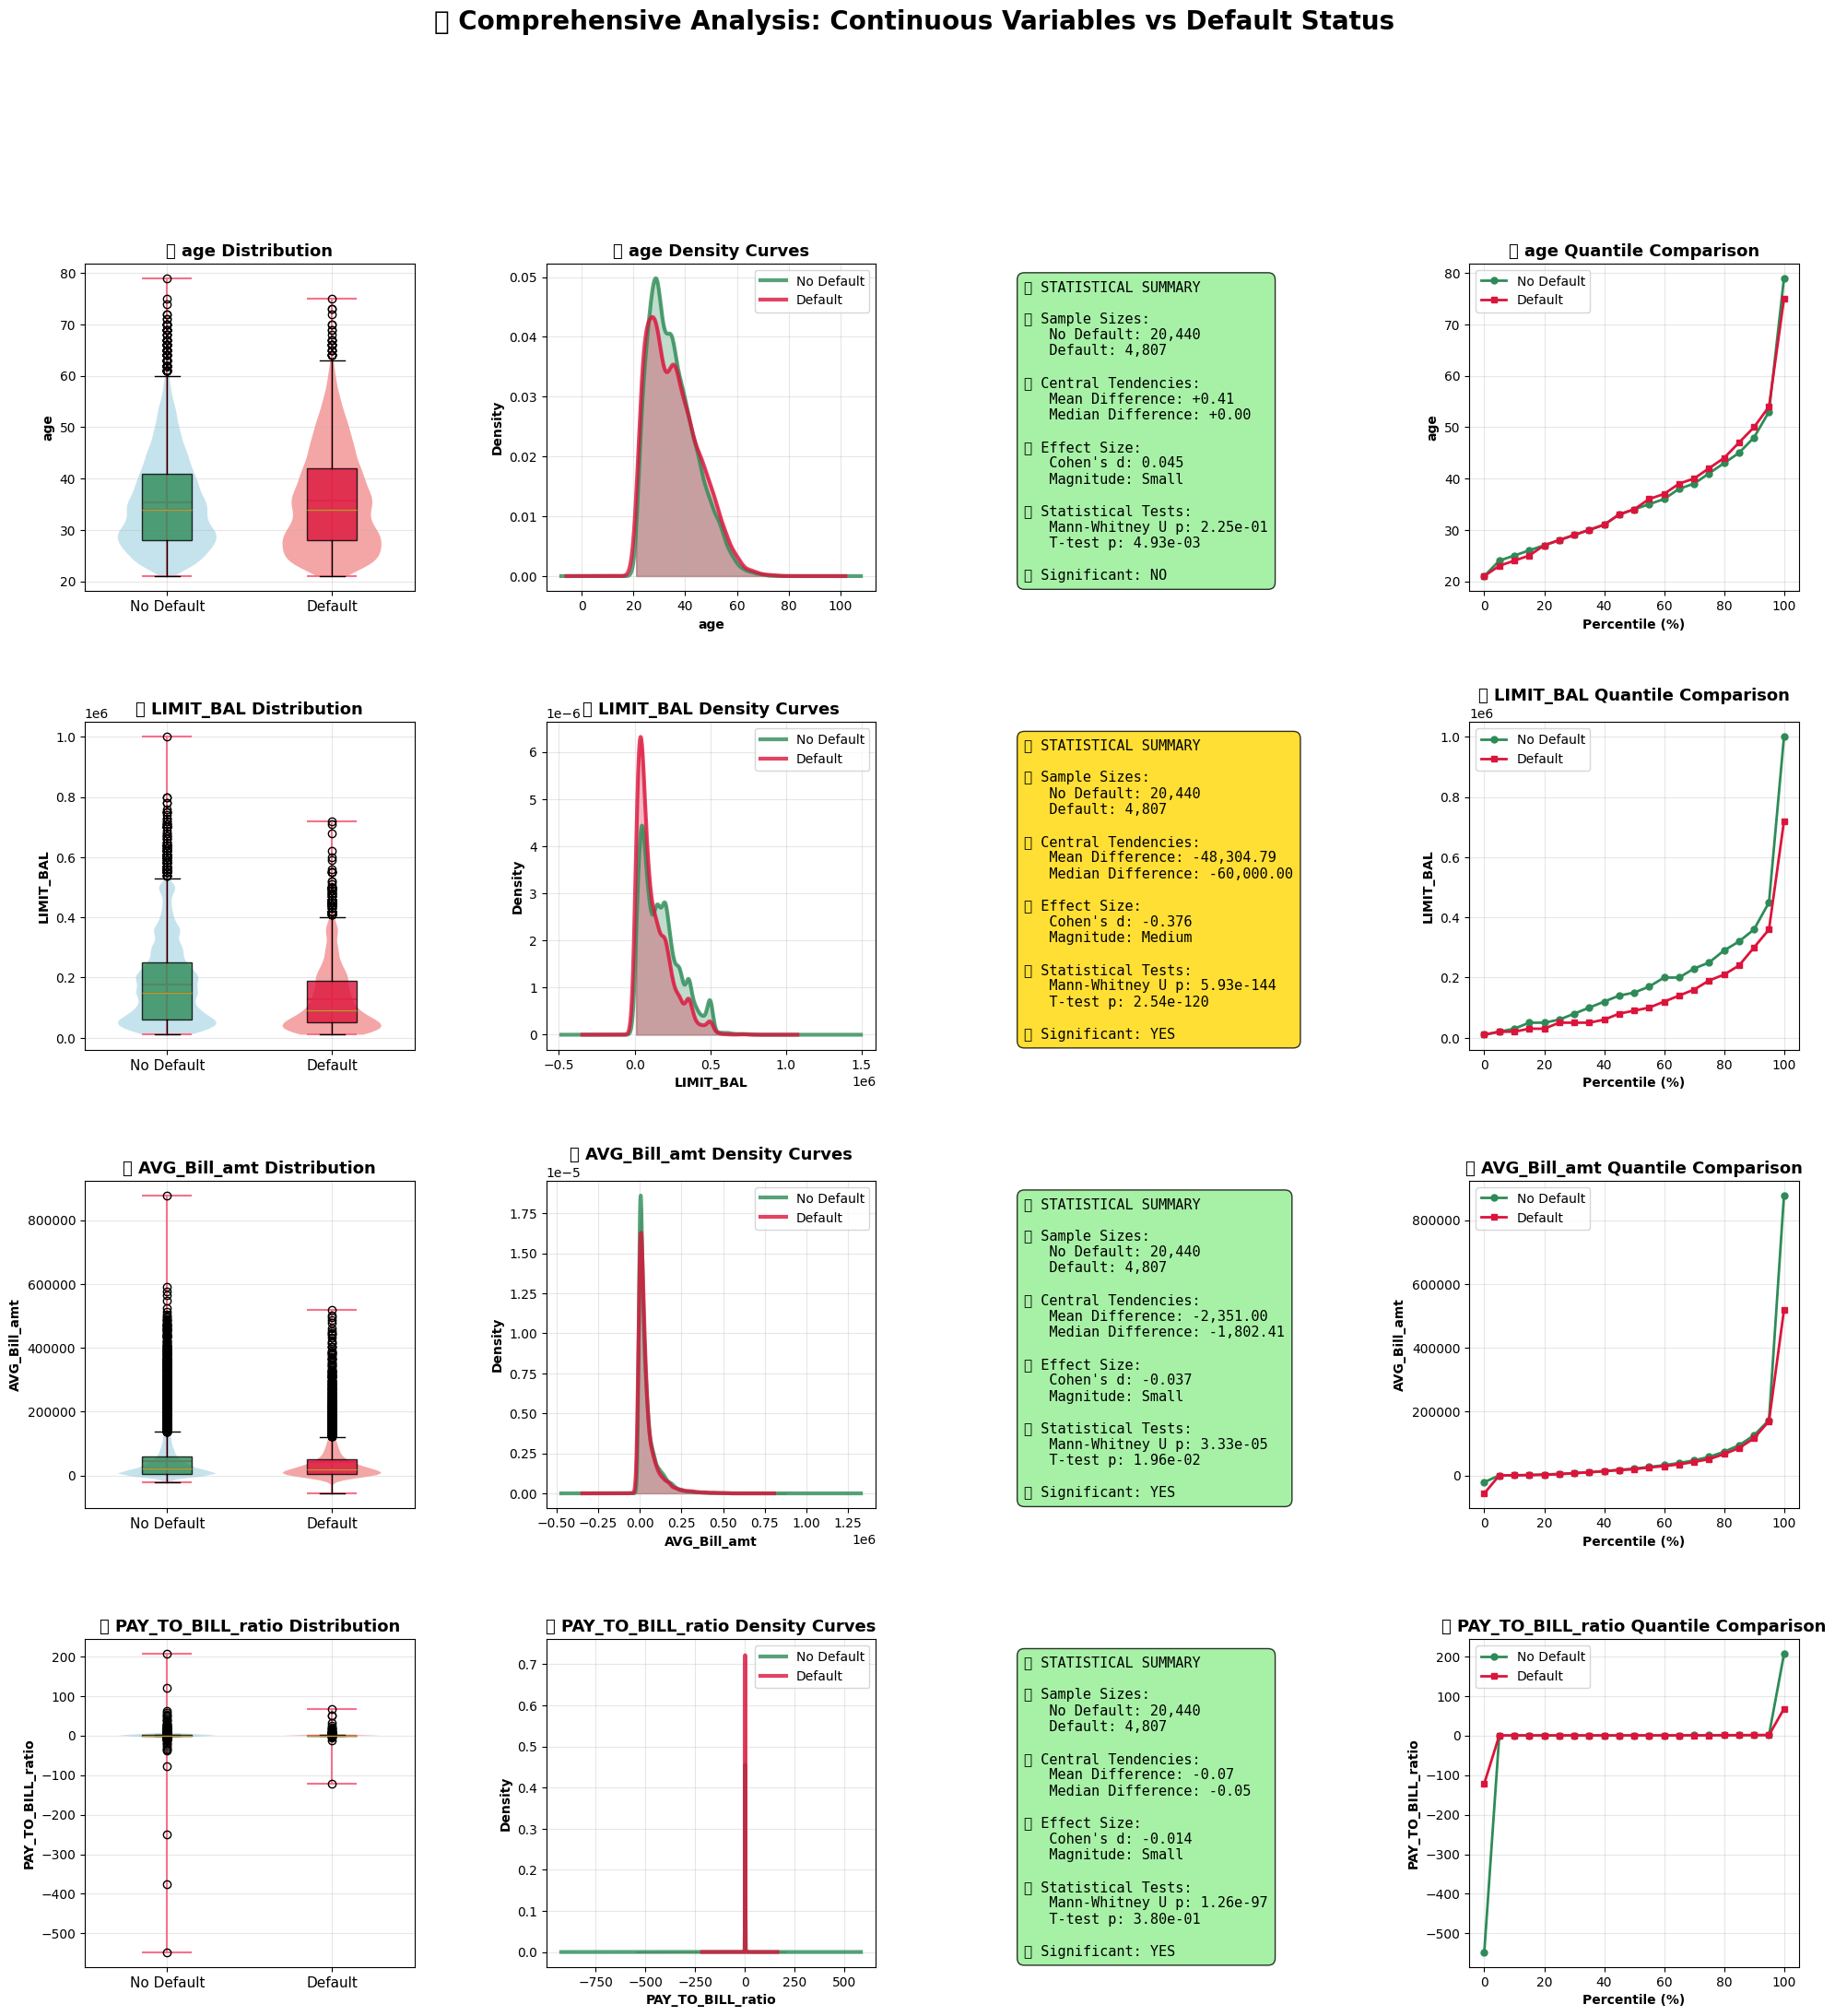

In [34]:
# Enhanced colorful analysis: Continuous variables by default status (Organized Layout)

import seaborn as sns
from scipy import stats
import matplotlib.patches as mpatches

print("🎨 Enhanced Continuous Variables Analysis by Default Status")
print("=" * 70)

# Create enhanced visualization with more space
n_vars = len(continuous_vars)
fig = plt.figure(figsize=(24, 6 * n_vars))  # Increased figure height
gs = fig.add_gridspec(n_vars, 4, hspace=0.4, wspace=0.4)  # More spacing

# Color palettes
colors_default = ['#2E8B57', '#DC143C']  # Sea Green, Crimson
colors_violin = ['lightblue', 'lightcoral']
effect_size_colors = {'Small': '#90EE90', 'Medium': '#FFD700', 'Large': '#FF6347', 'Very Large': '#8B0000'}

for i, var in enumerate(continuous_vars):
    if var in df.columns:
        no_default = df[df[target_col] == 0][var].dropna()
        default = df[df[target_col] == 1][var].dropna()

        # Box + Violin Plot
        ax1 = fig.add_subplot(gs[i, 0])
        violin_parts = ax1.violinplot([no_default, default], positions=[0, 1], widths=0.6, showmeans=True, showmedians=True)
        for j, pc in enumerate(violin_parts['bodies']):
            pc.set_facecolor(colors_violin[j])
            pc.set_alpha(0.7)
        bp = ax1.boxplot([no_default, default], positions=[0, 1], widths=0.3, patch_artist=True, showfliers=True)
        for j, box in enumerate(bp['boxes']):
            box.set_facecolor(colors_default[j])
            box.set_alpha(0.8)
        ax1.set_xticklabels(['No Default', 'Default'], fontsize=11)
        ax1.set_title(f'📊 {var} Distribution', fontweight='bold', fontsize=13)
        ax1.set_ylabel(var, fontweight='bold')
        ax1.grid(True, alpha=0.3)

        # Density Plot
        ax2 = fig.add_subplot(gs[i, 1])
        no_default.plot.kde(ax=ax2, color=colors_default[0], linewidth=3, alpha=0.8, label='No Default')
        default.plot.kde(ax=ax2, color=colors_default[1], linewidth=3, alpha=0.8, label='Default')
        x_range = np.linspace(min(no_default.min(), default.min()), max(no_default.max(), default.max()), 100)
        kde_no_default = stats.gaussian_kde(no_default)
        kde_default = stats.gaussian_kde(default)
        ax2.fill_between(x_range, kde_no_default(x_range), alpha=0.3, color=colors_default[0])
        ax2.fill_between(x_range, kde_default(x_range), alpha=0.3, color=colors_default[1])
        ax2.set_title(f'🌊 {var} Density Curves', fontweight='bold', fontsize=13)
        ax2.set_xlabel(var, fontweight='bold')
        ax2.set_ylabel('Density', fontweight='bold')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # Statistical Summary
        ax3 = fig.add_subplot(gs[i, 2])
        ax3.axis('off')
        mean_diff = default.mean() - no_default.mean()
        median_diff = default.median() - no_default.median()
        pooled_std = np.sqrt(((len(no_default) - 1) * no_default.var() + (len(default) - 1) * default.var()) / (len(no_default) + len(default) - 2))
        cohens_d = mean_diff / pooled_std if pooled_std > 0 else 0
        effect_size = ("Small" if abs(cohens_d) < 0.2 else 
                       "Medium" if abs(cohens_d) < 0.5 else 
                       "Large" if abs(cohens_d) < 0.8 else 
                       "Very Large")
        mannwhitney_stat, mannwhitney_p = stats.mannwhitneyu(no_default, default, alternative='two-sided')
        ttest_stat, ttest_p = stats.ttest_ind(no_default, default)
        summary_text = f"""📈 STATISTICAL SUMMARY

🎯 Sample Sizes:
   No Default: {len(no_default):,}
   Default: {len(default):,}

📊 Central Tendencies:
   Mean Difference: {mean_diff:+,.2f}
   Median Difference: {median_diff:+,.2f}

📐 Effect Size:
   Cohen's d: {cohens_d:.3f}
   Magnitude: {effect_size}

🧪 Statistical Tests:
   Mann-Whitney U p: {mannwhitney_p:.2e}
   T-test p: {ttest_p:.2e}

✅ Significant: {'YES' if mannwhitney_p < 0.05 else 'NO'}"""
        ax3.text(0.05, 0.95, summary_text, transform=ax3.transAxes, 
                 verticalalignment='top', fontsize=11, fontfamily='monospace',
                 bbox=dict(boxstyle='round,pad=0.5', facecolor=effect_size_colors.get(effect_size, 'lightgray'), 
                           alpha=0.8, edgecolor='black'))

        # Quantile Comparison
        ax4 = fig.add_subplot(gs[i, 3])
        quantiles = np.linspace(0, 1, 21)
        q_no_default = [no_default.quantile(q) for q in quantiles]
        q_default = [default.quantile(q) for q in quantiles]
        ax4.plot(quantiles * 100, q_no_default, 'o-', color=colors_default[0], linewidth=2, markersize=5, label='No Default')
        ax4.plot(quantiles * 100, q_default, 's-', color=colors_default[1], linewidth=2, markersize=5, label='Default')
        ax4.set_title(f'📏 {var} Quantile Comparison', fontweight='bold', fontsize=13)
        ax4.set_xlabel('Percentile (%)', fontweight='bold')
        ax4.set_ylabel(var, fontweight='bold')
        ax4.legend()
        ax4.grid(True, alpha=0.3)

plt.suptitle('🎨 Comprehensive Analysis: Continuous Variables vs Default Status', 
             fontsize=20, fontweight='bold', y=0.995)
plt.show()


## 4. 💰 Financial & Behavioral Insights

Let's analyze the financial and behavioral patterns that might indicate default risk.

💳 Enhanced Credit Utilization Analysis


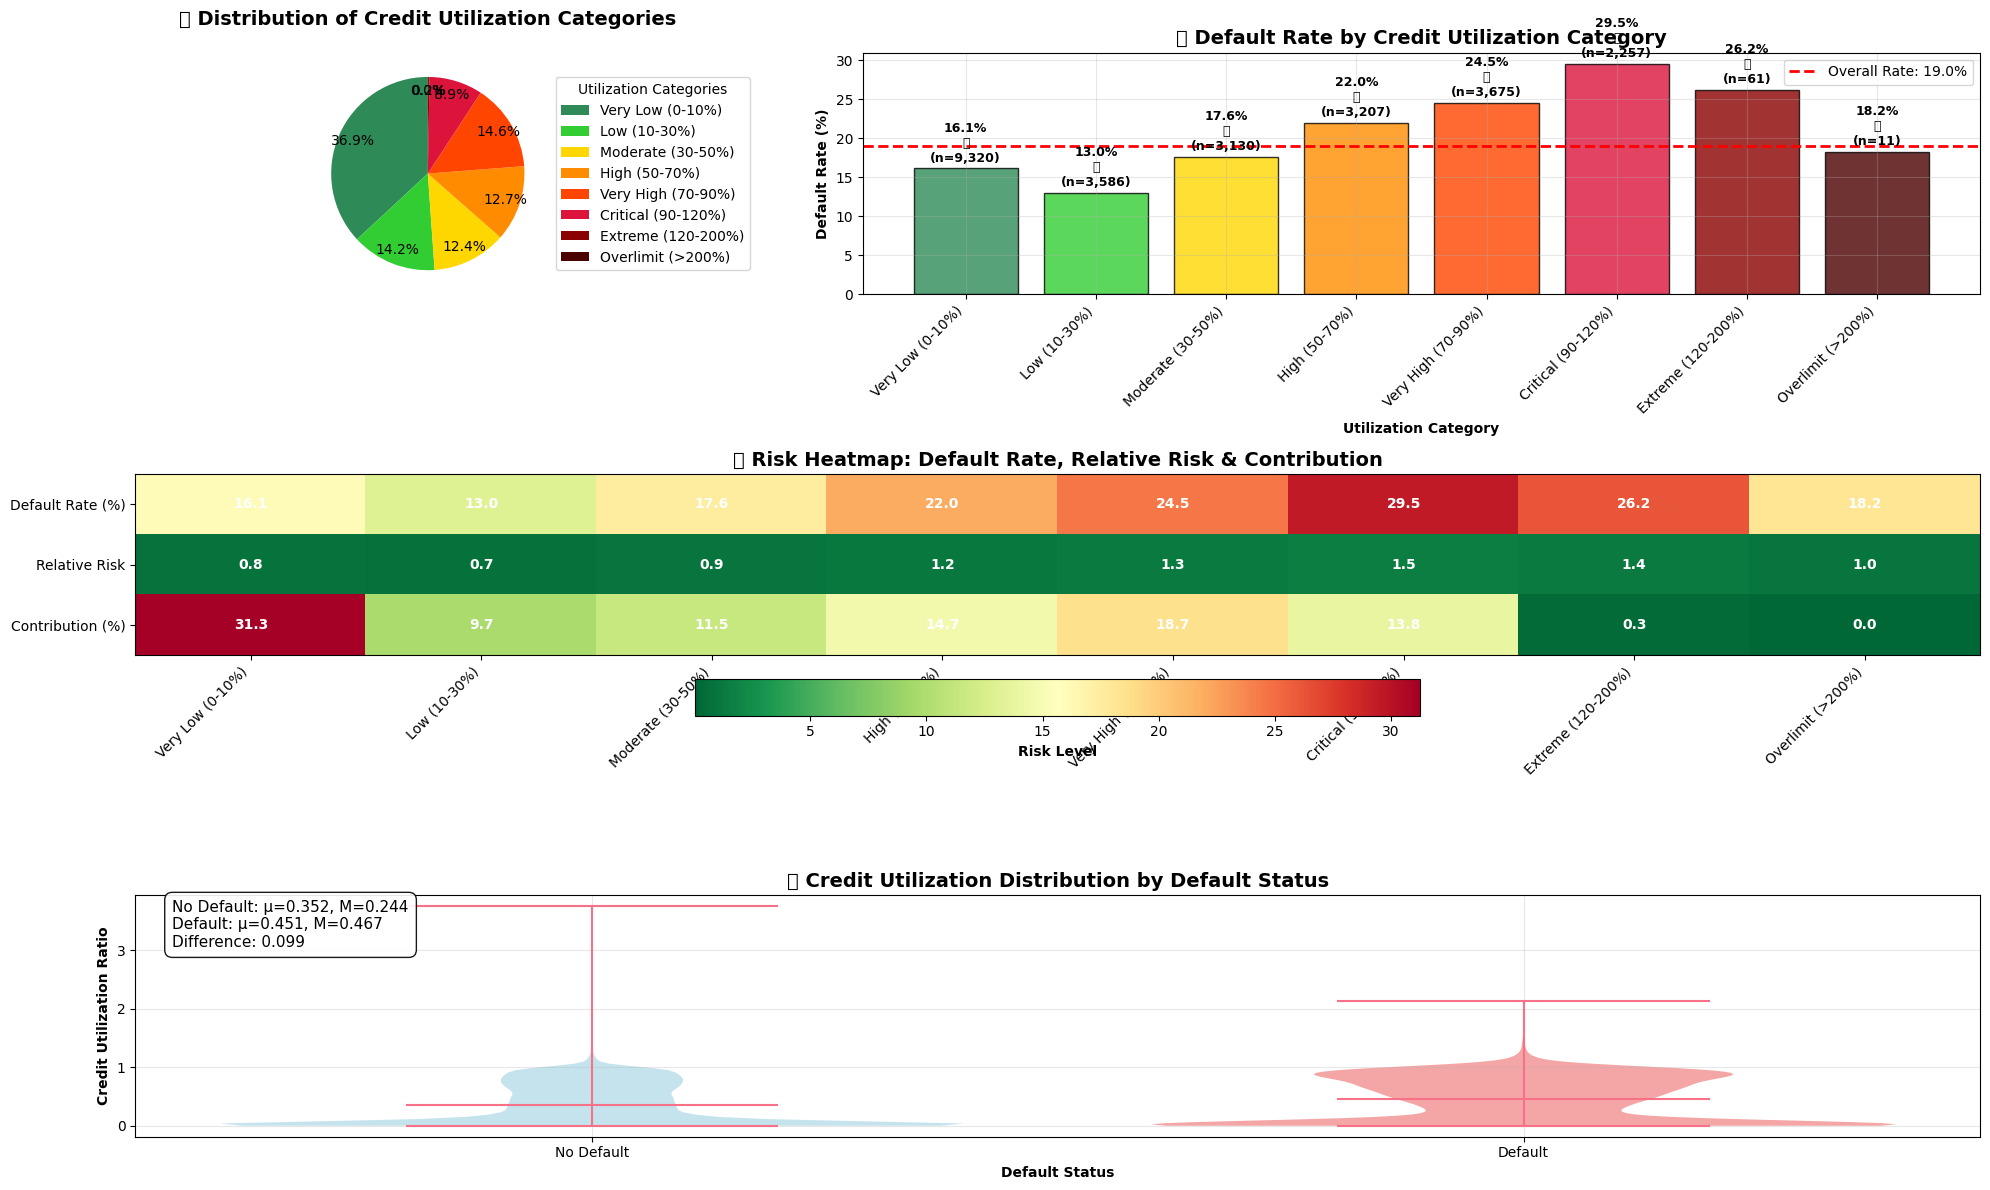


📈 Statistical Analysis:
Mann-Whitney U test:
  • Statistic: 42,727,620
  • P-value: 5.32e-45
  • Significant difference: YES

Chi-square test (utilization categories vs default):
  • Chi-square: 389.787
  • P-value: 3.69e-80
  • Significant association: YES

🔍 Detailed Credit Utilization Insights:

📊 Critical (90-120%):
   • Default Rate: 29.5%
   • Sample Size: 2,257 customers (8.9% of portfolio)
   • Defaults: 665 cases
   • Relative Risk: 1.55x baseline (🔴 EXTREME RISK)
   • Contribution: 13.8% of all defaults

📊 Extreme (120-200%):
   • Default Rate: 26.2%
   • Sample Size: 61 customers (0.2% of portfolio)
   • Defaults: 16 cases
   • Relative Risk: 1.38x baseline (🟠 HIGH RISK)
   • Contribution: 0.3% of all defaults

📊 Very High (70-90%):
   • Default Rate: 24.5%
   • Sample Size: 3,675 customers (14.6% of portfolio)
   • Defaults: 899 cases
   • Relative Risk: 1.28x baseline (🟠 HIGH RISK)
   • Contribution: 18.7% of all defaults

📊 High (50-70%):
   • Default Rate: 22.0%
   • Sa

In [36]:
# Enhanced Credit Utilization Ratio Analysis
import warnings
warnings.filterwarnings('ignore')

# Calculate Credit Utilization Ratio with better handling
df['credit_utilization_ratio'] = df['AVG_Bill_amt'] / (df['LIMIT_BAL'] + 1e-8)
df['credit_utilization_ratio'] = np.clip(df['credit_utilization_ratio'], 0, 10)  # Cap at 1000%

print("💳 Enhanced Credit Utilization Analysis")
print("=" * 80)

# Enhanced utilization categories with more granular buckets
df['utilization_category'] = pd.cut(df['credit_utilization_ratio'], 
                                   bins=[0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.2, 2.0, 10],
                                   labels=['Very Low (0-10%)', 'Low (10-30%)', 'Moderate (30-50%)',
                                          'High (50-70%)', 'Very High (70-90%)', 'Critical (90-120%)',
                                          'Extreme (120-200%)', 'Overlimit (>200%)'],
                                   include_lowest=True)

# Comprehensive analysis
util_analysis = df.groupby('utilization_category')[target_col].agg(['count', 'sum', 'mean']).reset_index()
util_analysis['default_rate_pct'] = util_analysis['mean'] * 100
util_analysis['relative_risk'] = util_analysis['mean'] / df[target_col].mean()
util_analysis['contribution_pct'] = util_analysis['sum'] / df[target_col].sum() * 100

# Create enhanced visualization with multiple insights
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, height_ratios=[1, 1, 1], width_ratios=[1.2, 1, 1])

# 1. Enhanced Pie Chart with better legend positioning
ax1 = fig.add_subplot(gs[0, 0])
util_counts = df['utilization_category'].value_counts().sort_index()

# Custom colors for utilization levels
colors_util = ['#2E8B57', '#32CD32', '#FFD700', '#FF8C00', '#FF4500', '#DC143C', '#8B0000', '#4B0000']
colors_util = colors_util[:len(util_counts)]

wedges, texts, autotexts = ax1.pie(util_counts.values, 
                                  labels=None,  # Remove labels from pie chart
                                  autopct='%1.1f%%', 
                                  startangle=90,
                                  colors=colors_util,
                                  pctdistance=0.85)

# Position legend outside the pie chart to avoid overlap
ax1.legend(wedges, util_counts.index, 
          title="Utilization Categories", 
          loc="center left", 
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=10)

ax1.set_title('💳 Distribution of Credit Utilization Categories', fontweight='bold', fontsize=14, pad=20)

# 2. Default Rates by Utilization with Risk Indicators
ax2 = fig.add_subplot(gs[0, 1:])
bars = ax2.bar(range(len(util_analysis)), util_analysis['default_rate_pct'], 
               color=colors_util, alpha=0.8, edgecolor='black', linewidth=1)

# Add overall default rate line
overall_rate = df[target_col].mean() * 100
ax2.axhline(y=overall_rate, color='red', linestyle='--', linewidth=2, 
           label=f'Overall Rate: {overall_rate:.1f}%')

ax2.set_title('🎯 Default Rate by Credit Utilization Category', fontweight='bold', fontsize=14)
ax2.set_xlabel('Utilization Category', fontweight='bold')
ax2.set_ylabel('Default Rate (%)', fontweight='bold')
ax2.set_xticks(range(len(util_analysis)))
ax2.set_xticklabels(util_analysis['utilization_category'], rotation=45, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Enhanced labels with risk indicators
for i, (bar, _, row) in enumerate(zip(bars, util_analysis['default_rate_pct'], util_analysis.itertuples())):
    height = bar.get_height()
    relative_risk = row.relative_risk
    
    # Risk emoji based on relative risk
    if relative_risk > 1.5:
        risk_emoji = "🔴"
    elif relative_risk > 1.2:
        risk_emoji = "🟠"
    elif relative_risk > 0.8:
        risk_emoji = "🟡"
    else:
        risk_emoji = "🟢"
    
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{row.default_rate_pct:.1f}%\n{risk_emoji}\n(n={row.count:,})',
            ha='center', va='bottom', fontweight='bold', fontsize=9)

# 3. Risk Distribution Heatmap
ax3 = fig.add_subplot(gs[1, :])
risk_data = util_analysis[['default_rate_pct', 'relative_risk', 'contribution_pct']].T
im = ax3.imshow(risk_data, cmap='RdYlGn_r', aspect='auto')
ax3.set_title('🔥 Risk Heatmap: Default Rate, Relative Risk & Contribution', fontweight='bold', fontsize=14)
ax3.set_xticks(range(len(util_analysis)))
ax3.set_xticklabels(util_analysis['utilization_category'], rotation=45, ha='right')
ax3.set_yticks(range(3))
ax3.set_yticklabels(['Default Rate (%)', 'Relative Risk', 'Contribution (%)'])

# Add text annotations
for i in range(len(util_analysis)):
    for j in range(3):
        text = ax3.text(i, j, f'{risk_data.iloc[j, i]:.1f}',
                       ha="center", va="center", color="white", fontweight='bold')

# Add colorbar
cbar = plt.colorbar(im, ax=ax3, orientation='horizontal', pad=0.1)
cbar.set_label('Risk Level', fontweight='bold')

# 4. Utilization Distribution by Default Status
ax4 = fig.add_subplot(gs[2, :])

# Create violin plots for better distribution visualization
default_util = df[df[target_col] == 1]['credit_utilization_ratio']
no_default_util = df[df[target_col] == 0]['credit_utilization_ratio']

parts = ax4.violinplot([no_default_util, default_util], positions=[0, 1], widths=0.8, showmeans=True)

# Color the violin plots
colors_violin = ['lightblue', 'lightcoral']
for pc, color in zip(parts['bodies'], colors_violin):
    pc.set_facecolor(color)
    pc.set_alpha(0.7)

ax4.set_title('🎻 Credit Utilization Distribution by Default Status', fontweight='bold', fontsize=14)
ax4.set_xlabel('Default Status', fontweight='bold')
ax4.set_ylabel('Credit Utilization Ratio', fontweight='bold')
ax4.set_xticks([0, 1])
ax4.set_xticklabels(['No Default', 'Default'])
ax4.grid(True, alpha=0.3)

# Add statistics
no_def_mean = no_default_util.mean()
def_mean = default_util.mean()
no_def_median = no_default_util.median()
def_median = default_util.median()

stats_text = (f'No Default: μ={no_def_mean:.3f}, M={no_def_median:.3f}\n'
             f'Default: μ={def_mean:.3f}, M={def_median:.3f}\n'
             f'Difference: {abs(def_mean - no_def_mean):.3f}')

ax4.text(0.02, 0.98, stats_text, transform=ax4.transAxes, 
        verticalalignment='top', fontsize=11,
        bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.9))

plt.tight_layout()
plt.show()

# Comprehensive statistical analysis
print(f"\n📈 Statistical Analysis:")
print("=" * 60)

# Mann-Whitney U test
from scipy.stats import mannwhitneyu, chi2_contingency
mannwhitney_stat, mannwhitney_p = mannwhitneyu(no_default_util, default_util, alternative='two-sided')

print(f"Mann-Whitney U test:")
print(f"  • Statistic: {mannwhitney_stat:,.0f}")
print(f"  • P-value: {mannwhitney_p:.2e}")
print(f"  • Significant difference: {'YES' if mannwhitney_p < 0.05 else 'NO'}")

# Chi-square test for categorical utilization
contingency_table = pd.crosstab(df['utilization_category'], df[target_col])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-square test (utilization categories vs default):")
print(f"  • Chi-square: {chi2:.3f}")
print(f"  • P-value: {p_value:.2e}")
print(f"  • Significant association: {'YES' if p_value < 0.05 else 'NO'}")

# Detailed insights
print(f"\n🔍 Detailed Credit Utilization Insights:")
print("=" * 70)

util_analysis_sorted = util_analysis.sort_values('default_rate_pct', ascending=False)

for _, row in util_analysis_sorted.iterrows():
    relative_risk = row['relative_risk']
    
    # Risk level classification
    if relative_risk > 1.5:
        risk_level = "🔴 EXTREME RISK"
    elif relative_risk > 1.2:
        risk_level = "🟠 HIGH RISK"
    elif relative_risk > 0.8:
        risk_level = "🟡 MODERATE RISK"
    else:
        risk_level = "🟢 LOW RISK"
    
    print(f"\n📊 {row['utilization_category']}:")
    print(f"   • Default Rate: {row['default_rate_pct']:.1f}%")
    print(f"   • Sample Size: {row['count']:,} customers ({row['count']/len(df)*100:.1f}% of portfolio)")
    print(f"   • Defaults: {row['sum']:,} cases")
    print(f"   • Relative Risk: {relative_risk:.2f}x baseline ({risk_level})")
    print(f"   • Contribution: {row['contribution_pct']:.1f}% of all defaults")

# Risk summary
print(f"\n🎯 Key Risk Summary:")
print("=" * 40)

high_risk_cats = util_analysis[util_analysis['relative_risk'] > 1.2]
if len(high_risk_cats) > 0:
    print(f"🔴 HIGH RISK CATEGORIES ({len(high_risk_cats)}):")
    for _, row in high_risk_cats.iterrows():
        print(f"   • {row['utilization_category']}: {row['default_rate_pct']:.1f}% default rate")

low_risk_cats = util_analysis[util_analysis['relative_risk'] < 0.8]
if len(low_risk_cats) > 0:
    print(f"\n🟢 LOW RISK CATEGORIES ({len(low_risk_cats)}):")
    for _, row in low_risk_cats.iterrows():
        print(f"   • {row['utilization_category']}: {row['default_rate_pct']:.1f}% default rate")

# Portfolio insights
extreme_util = len(df[df['credit_utilization_ratio'] > 1.0])
overlimit_util = len(df[df['credit_utilization_ratio'] > 2.0])

print(f"\n💼 Portfolio Risk Insights:")
print(f"   • {extreme_util:,} customers ({extreme_util/len(df)*100:.1f}%) exceed 100% utilization")
print(f"   • {overlimit_util:,} customers ({overlimit_util/len(df)*100:.1f}%) exceed 200% utilization")
print(f"   • Mean utilization: {df['credit_utilization_ratio'].mean():.1%}")
print(f"   • Median utilization: {df['credit_utilization_ratio'].median():.1%}")

print(f"\n✅ Enhanced credit utilization analysis completed!")

🕐 Enhanced Payment Delinquency Analysis
📋 Payment status columns: ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']


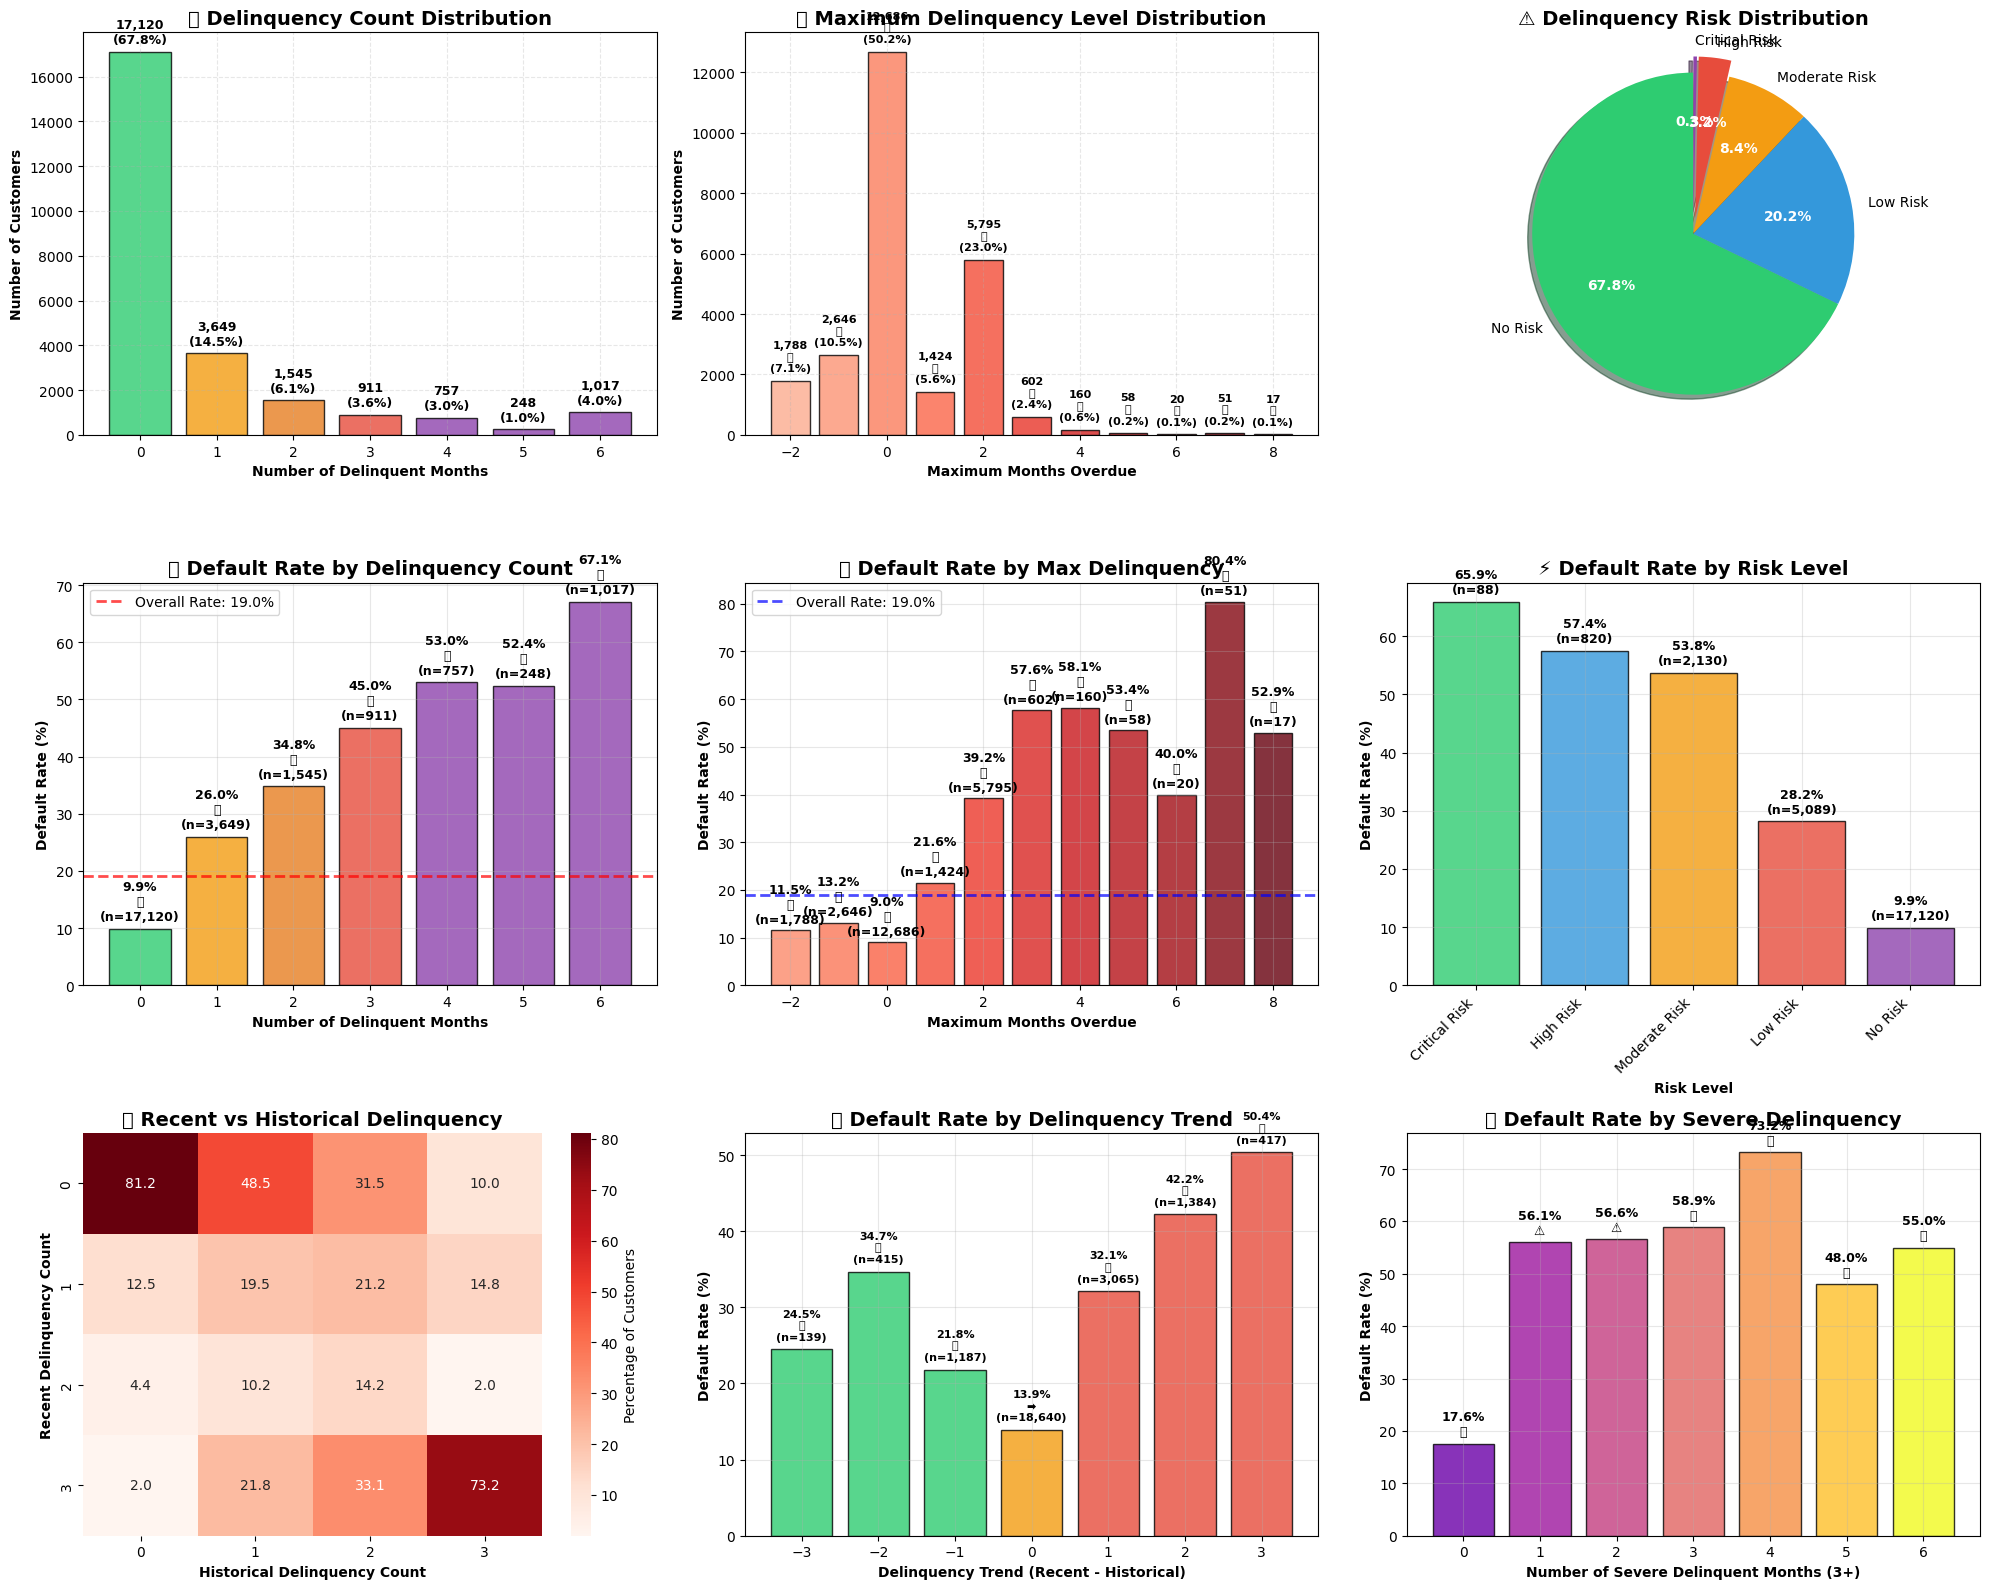


🎯 Enhanced Delinquency Analysis Insights
📊 Delinquency Statistics:
   • Average delinquent months per customer: 0.79
   • Average maximum delinquency level: 0.40
   • Customers with no delinquency: 17,120 (67.8%) ✅
   • Customers with chronic delinquency (3+ months): 2,933 (11.6%) ⚠️
   • Customers with severe delinquency (3+ months overdue): 908 (3.6%) 🔴

⚠️ Risk Level Distribution:
   • Critical Risk: 88.0 customers (0.3%) - 65.9% default rate 💀
     - Relative risk: 3.46x baseline
   • High Risk: 820.0 customers (3.2%) - 57.4% default rate 🔴
     - Relative risk: 3.02x baseline
   • Low Risk: 5,089.0 customers (20.2%) - 28.2% default rate 🟡
     - Relative risk: 1.48x baseline
   • Moderate Risk: 2,130.0 customers (8.4%) - 53.8% default rate 🟠
     - Relative risk: 2.82x baseline
   • No Risk: 17,120.0 customers (67.8%) - 9.9% default rate ✅
     - Relative risk: 0.52x baseline

📈 Delinquency-Default Correlations:
   • Delinquency Count: 0.390 (Strong Positive correlation) 🔴
   • M

In [41]:
# Enhanced Payment Delinquency Patterns Analysis
import seaborn as sns
from matplotlib.patches import Rectangle, Circle
import warnings
warnings.filterwarnings('ignore')

pay_status_cols = [col for col in df.columns if col.startswith('pay_') and 'amt' not in col]
print("🕐 Enhanced Payment Delinquency Analysis")
print("=" * 80)
print(f"📋 Payment status columns: {pay_status_cols}")

# Calculate comprehensive delinquency metrics
df['delinquency_count'] = (df[pay_status_cols] >= 1).sum(axis=1)
df['max_delinquency'] = df[pay_status_cols].max(axis=1)
df['severe_delinquency_count'] = (df[pay_status_cols] >= 3).sum(axis=1)
df['chronic_delinquency_count'] = (df[pay_status_cols] >= 6).sum(axis=1)

# Recent vs historical delinquency patterns
recent_pay_cols = pay_status_cols[:3] if len(pay_status_cols) >= 3 else pay_status_cols
historical_pay_cols = pay_status_cols[3:] if len(pay_status_cols) > 3 else []

df['recent_delinquency_count'] = (df[recent_pay_cols] >= 1).sum(axis=1)
if historical_pay_cols:
    df['historical_delinquency_count'] = (df[historical_pay_cols] >= 1).sum(axis=1)
    df['delinquency_trend'] = df['recent_delinquency_count'] - df['historical_delinquency_count']
else:
    df['historical_delinquency_count'] = 0
    df['delinquency_trend'] = 0

# Delinquency severity classification
def classify_delinquency_risk(row):
    if row['max_delinquency'] >= 6:
        return 'Critical Risk'
    elif row['max_delinquency'] >= 3:
        return 'High Risk'
    elif row['delinquency_count'] >= 3:
        return 'Moderate Risk'
    elif row['delinquency_count'] >= 1:
        return 'Low Risk'
    else:
        return 'No Risk'

df['delinquency_risk_level'] = df.apply(classify_delinquency_risk, axis=1)

# Enhanced colorful visualizations
fig = plt.figure(figsize=(20, 16))

# Color palettes
colors_delinq = ['#2ECC71', '#F39C12', '#E67E22', '#E74C3C', '#8E44AD']
colors_risk = ['#2ECC71', '#3498DB', '#F39C12', '#E74C3C', '#8E44AD']
colors_gradient = ['#E8F8F5', '#A9DFBF', '#F7DC6F', '#F1948A', '#C39BD3']

# 1. Delinquency count distribution with enhanced styling
ax1 = plt.subplot(3, 3, 1)
delinq_counts = df['delinquency_count'].value_counts().sort_index()
bars = plt.bar(delinq_counts.index, delinq_counts.values, 
               color=[colors_delinq[min(i, len(colors_delinq)-1)] for i in delinq_counts.index],
               alpha=0.8, edgecolor='black', linewidth=1)

plt.title('📊 Delinquency Count Distribution', fontweight='bold', fontsize=14)
plt.xlabel('Number of Delinquent Months', fontweight='bold')
plt.ylabel('Number of Customers', fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')

# Add percentage labels
total_customers = len(df)
for bar, count in zip(bars, delinq_counts.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + total_customers*0.01,
             f'{count:,}\n({count/total_customers*100:.1f}%)',
             ha='center', va='bottom', fontweight='bold', fontsize=9)

# 2. Maximum delinquency level distribution
ax2 = plt.subplot(3, 3, 2)
max_delinq_counts = df['max_delinquency'].value_counts().sort_index()
bars = plt.bar(max_delinq_counts.index, max_delinq_counts.values,
               color=plt.cm.Reds(np.linspace(0.3, 1, len(max_delinq_counts))),
               alpha=0.8, edgecolor='black', linewidth=1)

plt.title('🔥 Maximum Delinquency Level Distribution', fontweight='bold', fontsize=14)
plt.xlabel('Maximum Months Overdue', fontweight='bold')
plt.ylabel('Number of Customers', fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')

# Add labels with severity indicators
for bar, count, level in zip(bars, max_delinq_counts.values, max_delinq_counts.index):
    height = bar.get_height()
    severity_emoji = "🔴" if level >= 6 else "🟠" if level >= 3 else "🟡" if level >= 1 else "🟢"
    plt.text(bar.get_x() + bar.get_width()/2., height + total_customers*0.01,
             f'{count:,}\n{severity_emoji}\n({count/total_customers*100:.1f}%)',
             ha='center', va='bottom', fontweight='bold', fontsize=8)

# 3. Delinquency risk level distribution (pie chart)
ax3 = plt.subplot(3, 3, 3)
risk_counts = df['delinquency_risk_level'].value_counts()
risk_order = ['No Risk', 'Low Risk', 'Moderate Risk', 'High Risk', 'Critical Risk']
risk_counts = risk_counts.reindex([level for level in risk_order if level in risk_counts.index])

wedges, texts, autotexts = plt.pie(risk_counts.values, 
                                  labels=risk_counts.index,
                                  autopct='%1.1f%%', 
                                  startangle=90,
                                  colors=colors_risk[:len(risk_counts)],
                                  explode=[0.1 if 'Critical' in level or 'High' in level else 0 for level in risk_counts.index],
                                  shadow=True)

plt.title('⚠️ Delinquency Risk Distribution', fontweight='bold', fontsize=14)

# Enhance text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

# 4. Default rate by delinquency count with enhanced styling
ax4 = plt.subplot(3, 3, 4)
delinq_analysis = df.groupby('delinquency_count')[target_col].agg(['count', 'mean']).reset_index()
overall_default_rate = df[target_col].mean() * 100

bars = plt.bar(delinq_analysis['delinquency_count'], delinq_analysis['mean'] * 100,
               color=[colors_delinq[min(i, len(colors_delinq)-1)] for i in delinq_analysis['delinquency_count']],
               alpha=0.8, edgecolor='black', linewidth=1)

# Add overall default rate line
plt.axhline(y=overall_default_rate, color='red', linestyle='--', linewidth=2, 
           alpha=0.7, label=f'Overall Rate: {overall_default_rate:.1f}%')

plt.title('📈 Default Rate by Delinquency Count', fontweight='bold', fontsize=14)
plt.xlabel('Number of Delinquent Months', fontweight='bold')
plt.ylabel('Default Rate (%)', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Enhanced labels with risk indicators
for bar, rate, count, delinq_count in zip(bars, delinq_analysis['mean'], delinq_analysis['count'], delinq_analysis['delinquency_count']):
    height = bar.get_height()
    relative_risk = rate / df[target_col].mean()
    risk_indicator = "🔴" if relative_risk > 2 else "🟠" if relative_risk > 1.5 else "🟡" if relative_risk > 1 else "🟢"
    
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{rate*100:.1f}%\n{risk_indicator}\n(n={count:,})',
             ha='center', va='bottom', fontweight='bold', fontsize=9)

# 5. Default rate by maximum delinquency with enhanced styling
ax5 = plt.subplot(3, 3, 5)
max_delinq_analysis = df.groupby('max_delinquency')[target_col].agg(['count', 'mean']).reset_index()

bars = plt.bar(max_delinq_analysis['max_delinquency'], max_delinq_analysis['mean'] * 100,
               color=plt.cm.Reds(np.linspace(0.4, 1, len(max_delinq_analysis))),
               alpha=0.8, edgecolor='black', linewidth=1)

plt.axhline(y=overall_default_rate, color='blue', linestyle='--', linewidth=2, 
           alpha=0.7, label=f'Overall Rate: {overall_default_rate:.1f}%')

plt.title('🚨 Default Rate by Max Delinquency', fontweight='bold', fontsize=14)
plt.xlabel('Maximum Months Overdue', fontweight='bold')
plt.ylabel('Default Rate (%)', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Add enhanced labels
for bar, rate, count, max_delinq in zip(bars, max_delinq_analysis['mean'], max_delinq_analysis['count'], max_delinq_analysis['max_delinquency']):
    height = bar.get_height()
    relative_risk = rate / df[target_col].mean()
    risk_indicator = "🔴" if relative_risk > 3 else "🟠" if relative_risk > 2 else "🟡" if relative_risk > 1 else "🟢"
    
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{rate*100:.1f}%\n{risk_indicator}\n(n={count:,})',
             ha='center', va='bottom', fontweight='bold', fontsize=9)

# 6. Default rate by risk level
ax6 = plt.subplot(3, 3, 6)
risk_analysis = df.groupby('delinquency_risk_level')[target_col].agg(['count', 'mean']).reset_index()
risk_analysis = risk_analysis.sort_values('mean', ascending=False)

bars = plt.bar(range(len(risk_analysis)), risk_analysis['mean'] * 100,
               color=colors_risk[:len(risk_analysis)], 
               alpha=0.8, edgecolor='black', linewidth=1)

plt.title('⚡ Default Rate by Risk Level', fontweight='bold', fontsize=14)
plt.xlabel('Risk Level', fontweight='bold')
plt.ylabel('Default Rate (%)', fontweight='bold')
plt.xticks(range(len(risk_analysis)), risk_analysis['delinquency_risk_level'], rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Add labels
for bar, rate, count in zip(bars, risk_analysis['mean'], risk_analysis['count']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{rate*100:.1f}%\n(n={count:,})',
             ha='center', va='bottom', fontweight='bold', fontsize=9)

# 7. Recent vs Historical delinquency heatmap
ax7 = plt.subplot(3, 3, 7)
if historical_pay_cols:
    delinq_heatmap = pd.crosstab(df['recent_delinquency_count'], df['historical_delinquency_count'], normalize='columns') * 100
    sns.heatmap(delinq_heatmap, annot=True, fmt='.1f', cmap='Reds', 
                cbar_kws={'label': 'Percentage of Customers'}, ax=plt.gca())
    plt.title('🔥 Recent vs Historical Delinquency', fontweight='bold', fontsize=14)
    plt.xlabel('Historical Delinquency Count', fontweight='bold')
    plt.ylabel('Recent Delinquency Count', fontweight='bold')
else:
    plt.text(0.5, 0.5, 'Historical data\nnot available', 
             ha='center', va='center', transform=plt.gca().transAxes,
             fontsize=12, fontweight='bold')
    plt.title('Historical Analysis', fontweight='bold', fontsize=14)

# 8. Delinquency trend analysis
ax8 = plt.subplot(3, 3, 8)
if historical_pay_cols:
    trend_analysis = df.groupby('delinquency_trend')[target_col].agg(['count', 'mean']).reset_index()
    trend_analysis = trend_analysis[trend_analysis['count'] >= 10]  # Filter small groups
    
    trend_colors = ['#2ECC71' if x < 0 else '#F39C12' if x == 0 else '#E74C3C' for x in trend_analysis['delinquency_trend']]
    bars = plt.bar(trend_analysis['delinquency_trend'], trend_analysis['mean'] * 100,
                   color=trend_colors, alpha=0.8, edgecolor='black', linewidth=1)
    
    plt.title('📊 Default Rate by Delinquency Trend', fontweight='bold', fontsize=14)
    plt.xlabel('Delinquency Trend (Recent - Historical)', fontweight='bold')
    plt.ylabel('Default Rate (%)', fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # Add trend labels
    for bar, rate, count, trend in zip(bars, trend_analysis['mean'], trend_analysis['count'], trend_analysis['delinquency_trend']):
        height = bar.get_height()
        trend_emoji = "📈" if trend > 0 else "📉" if trend < 0 else "➡️"
        plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                 f'{rate*100:.1f}%\n{trend_emoji}\n(n={count:,})',
                 ha='center', va='bottom', fontweight='bold', fontsize=8)
else:
    plt.text(0.5, 0.5, 'Trend analysis\nnot available', 
             ha='center', va='center', transform=plt.gca().transAxes,
             fontsize=12, fontweight='bold')
    plt.title('Trend Analysis', fontweight='bold', fontsize=14)

# 9. Severe delinquency analysis
ax9 = plt.subplot(3, 3, 9)
severe_delinq_analysis = df.groupby('severe_delinquency_count')[target_col].agg(['count', 'mean']).reset_index()

bars = plt.bar(severe_delinq_analysis['severe_delinquency_count'], severe_delinq_analysis['mean'] * 100,
               color=plt.cm.plasma(np.linspace(0.2, 1, len(severe_delinq_analysis))),
               alpha=0.8, edgecolor='black', linewidth=1)

plt.title('💀 Default Rate by Severe Delinquency', fontweight='bold', fontsize=14)
plt.xlabel('Number of Severe Delinquent Months (3+)', fontweight='bold')
plt.ylabel('Default Rate (%)', fontweight='bold')
plt.grid(True, alpha=0.3)

# Add labels
for bar, rate, count, severe_count in zip(bars, severe_delinq_analysis['mean'], severe_delinq_analysis['count'], severe_delinq_analysis['severe_delinquency_count']):
    height = bar.get_height()
    if count >= 10:  # Only show labels for significant groups
        severity_emoji = "💀" if severe_count >= 3 else "⚠️" if severe_count >= 1 else "✅"
        plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                 f'{rate*100:.1f}%\n{severity_emoji}',
                 ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

# Enhanced comprehensive summary with insights
print(f"\n🎯 Enhanced Delinquency Analysis Insights")
print("=" * 80)

# Basic statistics
avg_delinq = df['delinquency_count'].mean()
max_delinq_avg = df['max_delinquency'].mean()
no_delinq_pct = (df['delinquency_count'] == 0).mean() * 100
chronic_delinq_pct = (df['delinquency_count'] >= 3).mean() * 100
severe_delinq_pct = (df['max_delinquency'] >= 3).mean() * 100

print(f"📊 Delinquency Statistics:")
print(f"   • Average delinquent months per customer: {avg_delinq:.2f}")
print(f"   • Average maximum delinquency level: {max_delinq_avg:.2f}")
print(f"   • Customers with no delinquency: {(df['delinquency_count'] == 0).sum():,} ({no_delinq_pct:.1f}%) ✅")
print(f"   • Customers with chronic delinquency (3+ months): {(df['delinquency_count'] >= 3).sum():,} ({chronic_delinq_pct:.1f}%) ⚠️")
print(f"   • Customers with severe delinquency (3+ months overdue): {(df['max_delinquency'] >= 3).sum():,} ({severe_delinq_pct:.1f}%) 🔴")

# Risk level analysis
print(f"\n⚠️ Risk Level Distribution:")
risk_stats = df.groupby('delinquency_risk_level')[target_col].agg(['count', 'mean'])
risk_emojis = {'No Risk': '✅', 'Low Risk': '🟡', 'Moderate Risk': '🟠', 'High Risk': '🔴', 'Critical Risk': '💀'}

for risk_level, stats in risk_stats.iterrows():
    emoji = risk_emojis.get(risk_level, '❓')
    relative_risk = stats['mean'] / df[target_col].mean()
    print(f"   • {risk_level}: {stats['count']:,} customers ({stats['count']/len(df)*100:.1f}%) - {stats['mean']*100:.1f}% default rate {emoji}")
    print(f"     - Relative risk: {relative_risk:.2f}x baseline")

# Correlation analysis
print(f"\n📈 Delinquency-Default Correlations:")
correlations = {
    'Delinquency Count': df['delinquency_count'].corr(df[target_col]),
    'Max Delinquency': df['max_delinquency'].corr(df[target_col]),
    'Recent Delinquency': df['recent_delinquency_count'].corr(df[target_col]),
}

if historical_pay_cols:
    correlations['Historical Delinquency'] = df['historical_delinquency_count'].corr(df[target_col])
    correlations['Delinquency Trend'] = df['delinquency_trend'].corr(df[target_col])

for metric, corr in correlations.items():
    strength = "Strong" if abs(corr) > 0.3 else "Moderate" if abs(corr) > 0.1 else "Weak"
    direction = "Positive" if corr > 0 else "Negative"
    emoji = "🔴" if abs(corr) > 0.3 else "🟡" if abs(corr) > 0.1 else "🟢"
    print(f"   • {metric}: {corr:.3f} ({strength} {direction} correlation) {emoji}")

# Key insights
print(f"\n🔑 Key Risk Insights:")
print("-" * 40)

# Identify highest risk categories
high_risk_insights = []

# Analyze delinquency count impact
no_delinq_default = df[df['delinquency_count'] == 0][target_col].mean() * 100
high_delinq_default = df[df['delinquency_count'] >= 5][target_col].mean() * 100 if (df['delinquency_count'] >= 5).sum() > 0 else 0

if high_delinq_default > 0:
    risk_multiplier = high_delinq_default / no_delinq_default if no_delinq_default > 0 else 0
    high_risk_insights.append(f"Customers with 5+ delinquent months have {risk_multiplier:.1f}x higher default risk")

# Analyze maximum delinquency impact
if (df['max_delinquency'] >= 6).sum() > 0:
    critical_default = df[df['max_delinquency'] >= 6][target_col].mean() * 100
    critical_multiplier = critical_default / overall_default_rate
    high_risk_insights.append(f"Customers with 6+ months overdue have {critical_multiplier:.1f}x higher default risk")

# Recent vs historical pattern
if historical_pay_cols and (df['delinquency_trend'] > 0).sum() > 0:
    worsening_default = df[df['delinquency_trend'] > 0][target_col].mean() * 100
    improving_default = df[df['delinquency_trend'] < 0][target_col].mean() * 100
    if improving_default > 0:
        trend_ratio = worsening_default / improving_default
        high_risk_insights.append(f"Worsening delinquency trends show {trend_ratio:.1f}x higher default risk than improving trends")

# Display insights
if high_risk_insights:
    for i, insight in enumerate(high_risk_insights, 1):
        print(f"   {i}. {insight}")
else:
    print("   • Analysis shows expected correlation between delinquency and default risk")

# Risk recommendations
print(f"\n💡 Risk Management Recommendations:")
print("-" * 45)
print("   1. 🎯 Priority monitoring for customers with 3+ delinquent months")
print("   2. 🚨 Immediate intervention for customers with 6+ months overdue")
print("   3. 📈 Track delinquency trends for early warning signals")
print("   4. 🔍 Enhanced screening for customers showing recent delinquency increases")

print(f"\n✅ Enhanced delinquency analysis completed!")

💸 Enhanced Payment Behavior Analysis
📋 Bill amount columns: ['Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6']
💰 Payment amount columns: ['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']


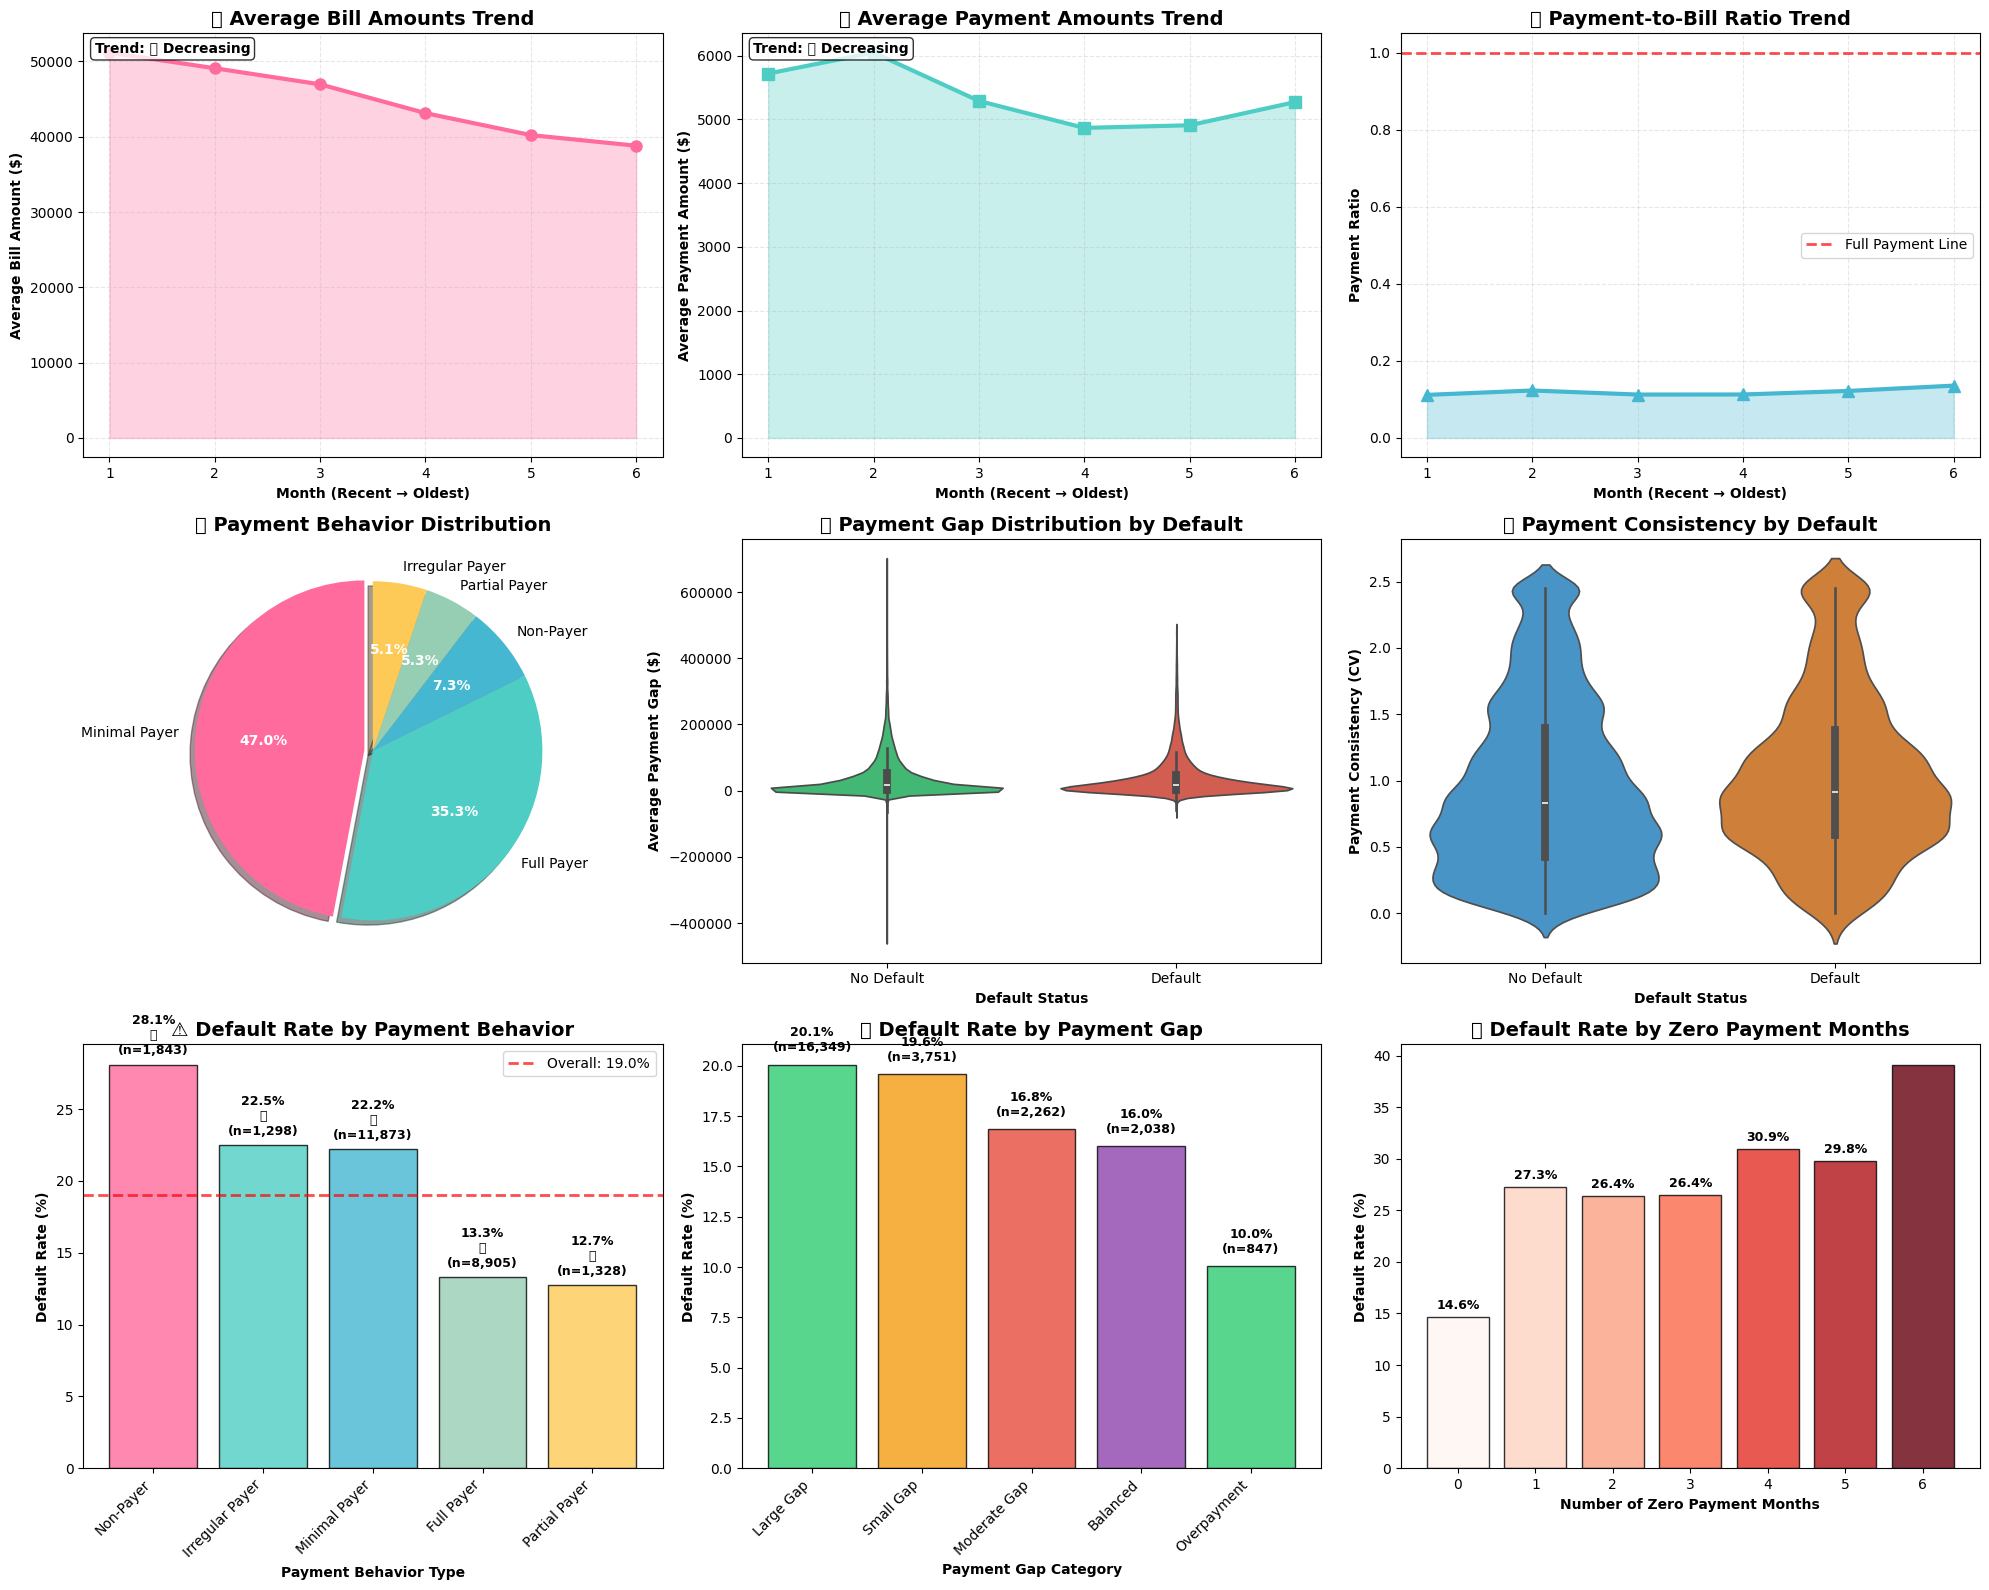


🎯 Enhanced Payment Behavior Insights
💰 Payment Gap Analysis:
   • Average payment gap: $39,547.26
   • Median payment gap: $16,950.79
   • Customers with chronic underpayment (gap > $1000): 18,611 (73.7%)
   • Customers overpaying (gap < $0): 2,881 (11.4%)

🚫 Zero Payment Analysis:
   • Customers with 0 zero payment months: 16,393 (64.9%)
   • Customers with 1-2 zero payment months: 7,011 (27.8%)
   • Customers with 3+ zero payment months: 1,843 (7.3%)

🎯 Payment Behavior Categories:
   • Full Payer: 8,905.0 customers (35.3%) - 13.3% default rate 🟢
   • Irregular Payer: 1,298.0 customers (5.1%) - 22.5% default rate 🟡
   • Minimal Payer: 11,873.0 customers (47.0%) - 22.2% default rate 🟡
   • Non-Payer: 1,843.0 customers (7.3%) - 28.1% default rate 🟡
   • Partial Payer: 1,328.0 customers (5.3%) - 12.7% default rate 🟢

📊 Payment Pattern Correlations with Default Risk:
   • Payment Gap: 0.001 (Weak Positive correlation)
   • Payment Consistency: 0.048 (Weak Positive correlation)
   • Zero

In [40]:
# Enhanced Payment Behavior and Trends Analysis
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

bill_cols = [f'Bill_amt{i}' for i in range(1, 7) if f'Bill_amt{i}' in df.columns]
pay_cols = [f'pay_amt{i}' for i in range(1, 7) if f'pay_amt{i}' in df.columns]

print("💸 Enhanced Payment Behavior Analysis")
print("=" * 80)
print(f"📋 Bill amount columns: {bill_cols}")
print(f"💰 Payment amount columns: {pay_cols}")

# Calculate enhanced payment gaps and behavior metrics
if len(bill_cols) >= 3 and len(pay_cols) >= 3:
    # Payment gaps (how much less was paid vs bill)
    payment_gaps = []
    payment_ratios = []
    for i in range(min(len(bill_cols), len(pay_cols))):
        gap = df[bill_cols[i]] - df[pay_cols[i]]
        ratio = df[pay_cols[i]] / (df[bill_cols[i]] + 1e-8)
        payment_gaps.append(gap)
        payment_ratios.append(ratio)
    
    payment_gap_df = pd.DataFrame(payment_gaps).T
    payment_ratio_df = pd.DataFrame(payment_ratios).T
    
    # Enhanced metrics
    df['avg_payment_gap'] = payment_gap_df.mean(axis=1)
    df['payment_gap_trend'] = payment_gap_df.iloc[:, -1] - payment_gap_df.iloc[:, 0]
    df['avg_payment_ratio'] = payment_ratio_df.mean(axis=1)
    df['payment_ratio_std'] = payment_ratio_df.std(axis=1)
    
    # Payment consistency and behavior patterns
    df['payment_amount_std'] = df[pay_cols].std(axis=1)
    df['payment_amount_mean'] = df[pay_cols].mean(axis=1)
    df['payment_consistency'] = df['payment_amount_std'] / (df['payment_amount_mean'] + 1e-8)
    
    # Payment behavior categories
    df['zero_payment_months'] = (df[pay_cols] == 0).sum(axis=1)
    df['full_payment_months'] = (payment_ratio_df >= 0.95).sum(axis=1)
    df['minimal_payment_months'] = ((payment_ratio_df > 0) & (payment_ratio_df < 0.1)).sum(axis=1)
    
    # Payment behavior classification
    def classify_payment_behavior(row):
        if row['zero_payment_months'] >= 3:
            return 'Non-Payer'
        elif row['avg_payment_ratio'] >= 0.8:
            return 'Full Payer'
        elif row['avg_payment_ratio'] >= 0.3:
            return 'Partial Payer'
        elif row['minimal_payment_months'] >= 3:
            return 'Minimal Payer'
        else:
            return 'Irregular Payer'
    
    df['payment_behavior'] = df.apply(classify_payment_behavior, axis=1)

# Create enhanced colorful visualizations
fig = plt.figure(figsize=(20, 16))

# Define color palettes
colors_temporal = ['#FF6B9D', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9FF3']
colors_behavior = ['#FF6B9D', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']
colors_risk = ['#2ECC71', '#F39C12', '#E74C3C', '#8E44AD']

# 1. Enhanced temporal trends (2x2 grid in top half)
ax1 = plt.subplot(3, 3, 1)
if len(bill_cols) >= 3:
    monthly_bills = df[bill_cols].mean()
    plt.plot(range(1, len(monthly_bills)+1), monthly_bills, 
             marker='o', linewidth=3, markersize=8, color='#FF6B9D')
    plt.fill_between(range(1, len(monthly_bills)+1), monthly_bills, alpha=0.3, color='#FF6B9D')
    plt.title('📈 Average Bill Amounts Trend', fontweight='bold', fontsize=14)
    plt.xlabel('Month (Recent → Oldest)', fontweight='bold')
    plt.ylabel('Average Bill Amount ($)', fontweight='bold')
    plt.grid(True, alpha=0.3, linestyle='--')
    
    # Add trend annotation
    trend = "📈 Increasing" if monthly_bills.iloc[-1] > monthly_bills.iloc[0] else "📉 Decreasing"
    plt.text(0.02, 0.98, f'Trend: {trend}', transform=plt.gca().transAxes, 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
             verticalalignment='top', fontweight='bold')

ax2 = plt.subplot(3, 3, 2)
if len(pay_cols) >= 3:
    monthly_payments = df[pay_cols].mean()
    plt.plot(range(1, len(monthly_payments)+1), monthly_payments, 
             marker='s', linewidth=3, markersize=8, color='#4ECDC4')
    plt.fill_between(range(1, len(monthly_payments)+1), monthly_payments, alpha=0.3, color='#4ECDC4')
    plt.title('💰 Average Payment Amounts Trend', fontweight='bold', fontsize=14)
    plt.xlabel('Month (Recent → Oldest)', fontweight='bold')
    plt.ylabel('Average Payment Amount ($)', fontweight='bold')
    plt.grid(True, alpha=0.3, linestyle='--')
    
    # Add trend annotation
    trend = "📈 Increasing" if monthly_payments.iloc[-1] > monthly_payments.iloc[0] else "📉 Decreasing"
    plt.text(0.02, 0.98, f'Trend: {trend}', transform=plt.gca().transAxes, 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
             verticalalignment='top', fontweight='bold')

# 3. Payment ratio over time
ax3 = plt.subplot(3, 3, 3)
if len(bill_cols) >= 3 and len(pay_cols) >= 3:
    monthly_ratios = []
    for i in range(min(len(bill_cols), len(pay_cols))):
        ratio = df[pay_cols[i]].sum() / (df[bill_cols[i]].sum() + 1e-8)
        monthly_ratios.append(ratio)
    
    plt.plot(range(1, len(monthly_ratios)+1), monthly_ratios, 
             marker='^', linewidth=3, markersize=8, color='#45B7D1')
    plt.fill_between(range(1, len(monthly_ratios)+1), monthly_ratios, alpha=0.3, color='#45B7D1')
    plt.axhline(y=1.0, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Full Payment Line')
    plt.title('📊 Payment-to-Bill Ratio Trend', fontweight='bold', fontsize=14)
    plt.xlabel('Month (Recent → Oldest)', fontweight='bold')
    plt.ylabel('Payment Ratio', fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3, linestyle='--')

# 4. Payment behavior distribution
ax4 = plt.subplot(3, 3, 4)
if 'payment_behavior' in df.columns:
    behavior_counts = df['payment_behavior'].value_counts()
    wedges, texts, autotexts = plt.pie(behavior_counts.values, 
                                      labels=behavior_counts.index,
                                      autopct='%1.1f%%', 
                                      startangle=90,
                                      colors=colors_behavior,
                                      explode=[0.05 if x == behavior_counts.max() else 0 for x in behavior_counts.values],
                                      shadow=True)
    plt.title('🎯 Payment Behavior Distribution', fontweight='bold', fontsize=14)
    
    # Enhance text
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(10)

# 5. Enhanced violin plots for payment gaps by default status
ax5 = plt.subplot(3, 3, 5)
if 'avg_payment_gap' in df.columns:
    sns.violinplot(data=df, x=target_col, y='avg_payment_gap', 
                   palette=['#2ECC71', '#E74C3C'], ax=plt.gca())
    plt.title('🎻 Payment Gap Distribution by Default', fontweight='bold', fontsize=14)
    plt.xlabel('Default Status', fontweight='bold')
    plt.ylabel('Average Payment Gap ($)', fontweight='bold')
    plt.xticks([0, 1], ['No Default', 'Default'])

# 6. Enhanced violin plots for payment consistency
ax6 = plt.subplot(3, 3, 6)
if 'payment_consistency' in df.columns:
    # Cap extreme values for better visualization
    df_viz = df.copy()
    df_viz['payment_consistency_capped'] = np.clip(df_viz['payment_consistency'], 0, 5)
    
    sns.violinplot(data=df_viz, x=target_col, y='payment_consistency_capped', 
                   palette=['#3498DB', '#E67E22'], ax=plt.gca())
    plt.title('🎨 Payment Consistency by Default', fontweight='bold', fontsize=14)
    plt.xlabel('Default Status', fontweight='bold')
    plt.ylabel('Payment Consistency (CV)', fontweight='bold')
    plt.xticks([0, 1], ['No Default', 'Default'])

# 7. Payment behavior vs default rates
ax7 = plt.subplot(3, 3, 7)
if 'payment_behavior' in df.columns:
    behavior_default = df.groupby('payment_behavior')[target_col].agg(['count', 'mean']).reset_index()
    behavior_default = behavior_default.sort_values('mean', ascending=False)
    
    bars = plt.bar(range(len(behavior_default)), behavior_default['mean'] * 100,
                   color=colors_behavior[:len(behavior_default)], 
                   alpha=0.8, edgecolor='black', linewidth=1)
    
    plt.title('⚠️ Default Rate by Payment Behavior', fontweight='bold', fontsize=14)
    plt.xlabel('Payment Behavior Type', fontweight='bold')
    plt.ylabel('Default Rate (%)', fontweight='bold')
    plt.xticks(range(len(behavior_default)), behavior_default['payment_behavior'], rotation=45, ha='right')
    
    # Add percentage labels with risk indicators
    overall_default_rate = df[target_col].mean() * 100
    for i, (bar, rate, count) in enumerate(zip(bars, behavior_default['mean'], behavior_default['count'])):
        height = bar.get_height()
        risk_indicator = "🔴" if rate * 100 > overall_default_rate * 1.5 else "🟡" if rate * 100 > overall_default_rate else "🟢"
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{rate*100:.1f}%\n{risk_indicator}\n(n={count:,})',
                ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    # Add overall rate line
    plt.axhline(y=overall_default_rate, color='red', linestyle='--', linewidth=2, 
               alpha=0.7, label=f'Overall: {overall_default_rate:.1f}%')
    plt.legend()

# 8. Payment gap categories analysis
ax8 = plt.subplot(3, 3, 8)
if 'avg_payment_gap' in df.columns:
    gap_categories = pd.cut(df['avg_payment_gap'], 
                           bins=[-np.inf, -1000, 0, 1000, 5000, np.inf],
                           labels=['Overpayment', 'Balanced', 'Small Gap', 'Moderate Gap', 'Large Gap'])
    
    gap_analysis = df.groupby(gap_categories)[target_col].agg(['count', 'mean']).reset_index()
    gap_analysis = gap_analysis.sort_values('mean', ascending=False)
    
    bars = plt.bar(range(len(gap_analysis)), gap_analysis['mean'] * 100,
                   color=colors_risk[:len(gap_analysis)], 
                   alpha=0.8, edgecolor='black', linewidth=1)
    
    plt.title('💳 Default Rate by Payment Gap', fontweight='bold', fontsize=14)
    plt.xlabel('Payment Gap Category', fontweight='bold')
    plt.ylabel('Default Rate (%)', fontweight='bold')
    plt.xticks(range(len(gap_analysis)), gap_analysis['avg_payment_gap'], rotation=45, ha='right')
    
    # Add labels
    for bar, rate, count in zip(bars, gap_analysis['mean'], gap_analysis['count']):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{rate*100:.1f}%\n(n={count:,})',
                ha='center', va='bottom', fontweight='bold', fontsize=9)

# 9. Zero payment months analysis
ax9 = plt.subplot(3, 3, 9)
if 'zero_payment_months' in df.columns:
    zero_pay_analysis = df.groupby('zero_payment_months')[target_col].agg(['count', 'mean']).reset_index()
    
    bars = plt.bar(zero_pay_analysis['zero_payment_months'], zero_pay_analysis['mean'] * 100,
                   color=plt.cm.Reds(zero_pay_analysis['zero_payment_months'] / zero_pay_analysis['zero_payment_months'].max()),
                   alpha=0.8, edgecolor='black', linewidth=1)
    
    plt.title('🚫 Default Rate by Zero Payment Months', fontweight='bold', fontsize=14)
    plt.xlabel('Number of Zero Payment Months', fontweight='bold')
    plt.ylabel('Default Rate (%)', fontweight='bold')
    
    # Add labels
    for bar, rate, count in zip(bars, zero_pay_analysis['mean'], zero_pay_analysis['count']):
        height = bar.get_height()
        if count > 50:  # Only show labels for significant groups
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{rate*100:.1f}%',
                    ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

# Enhanced summary with colorful insights
print(f"\n🎯 Enhanced Payment Behavior Insights")
print("=" * 80)

if 'avg_payment_gap' in df.columns:
    avg_gap = df['avg_payment_gap'].mean()
    median_gap = df['avg_payment_gap'].median()
    
    print(f"💰 Payment Gap Analysis:")
    print(f"   • Average payment gap: ${avg_gap:,.2f}")
    print(f"   • Median payment gap: ${median_gap:,.2f}")
    print(f"   • Customers with chronic underpayment (gap > $1000): {(df['avg_payment_gap'] > 1000).sum():,} ({(df['avg_payment_gap'] > 1000).mean()*100:.1f}%)")
    print(f"   • Customers overpaying (gap < $0): {(df['avg_payment_gap'] < 0).sum():,} ({(df['avg_payment_gap'] < 0).mean()*100:.1f}%)")
    
    if 'zero_payment_months' in df.columns:
        print(f"\n🚫 Zero Payment Analysis:")
        print(f"   • Customers with 0 zero payment months: {(df['zero_payment_months'] == 0).sum():,} ({(df['zero_payment_months'] == 0).mean()*100:.1f}%)")
        print(f"   • Customers with 1-2 zero payment months: {((df['zero_payment_months'] >= 1) & (df['zero_payment_months'] <= 2)).sum():,} ({((df['zero_payment_months'] >= 1) & (df['zero_payment_months'] <= 2)).mean()*100:.1f}%)")
        print(f"   • Customers with 3+ zero payment months: {(df['zero_payment_months'] >= 3).sum():,} ({(df['zero_payment_months'] >= 3).mean()*100:.1f}%)")
    
    if 'payment_behavior' in df.columns:
        print(f"\n🎯 Payment Behavior Categories:")
        behavior_stats = df.groupby('payment_behavior')[target_col].agg(['count', 'mean'])
        for behavior, stats in behavior_stats.iterrows():
            risk_emoji = "🔴" if stats['mean'] > df[target_col].mean() * 1.5 else "🟡" if stats['mean'] > df[target_col].mean() else "🟢"
            print(f"   • {behavior}: {stats['count']:,} customers ({stats['count']/len(df)*100:.1f}%) - {stats['mean']*100:.1f}% default rate {risk_emoji}")
    
    # Risk correlation analysis
    if 'payment_consistency' in df.columns:
        print(f"\n📊 Payment Pattern Correlations with Default Risk:")
        correlations = {
            'Payment Gap': df['avg_payment_gap'].corr(df[target_col]),
            'Payment Consistency': df['payment_consistency'].corr(df[target_col]),
            'Zero Payment Months': df['zero_payment_months'].corr(df[target_col]),
        }
        
        if 'avg_payment_ratio' in df.columns:
            correlations['Payment Ratio'] = df['avg_payment_ratio'].corr(df[target_col])
        
        for metric, corr in correlations.items():
            strength = "Strong" if abs(corr) > 0.3 else "Moderate" if abs(corr) > 0.1 else "Weak"
            direction = "Positive" if corr > 0 else "Negative"
            print(f"   • {metric}: {corr:.3f} ({strength} {direction} correlation)")

print(f"\n✅ Enhanced payment behavior analysis completed!")

### 4.1 Correlation Analysis

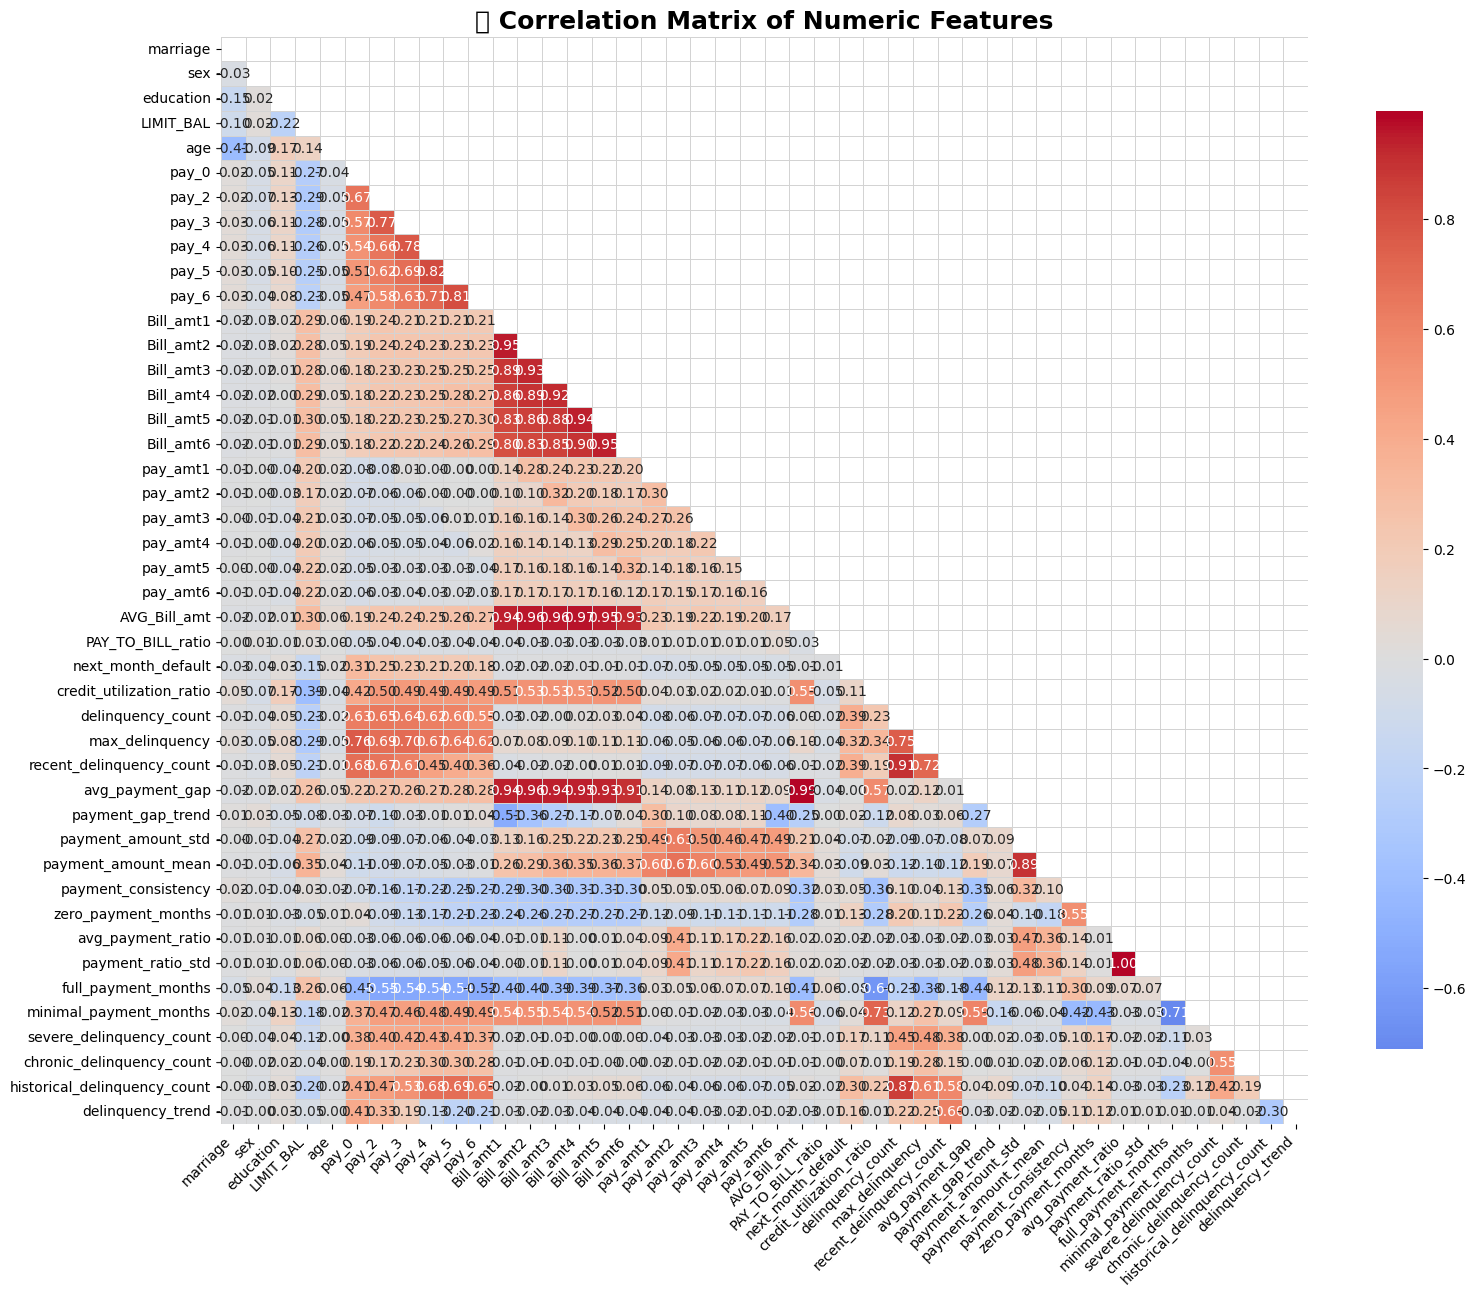

🎯 Top Correlations with Default Status
delinquency_count: 0.390
recent_delinquency_count: 0.386
max_delinquency: 0.316
pay_0: 0.313
historical_delinquency_count: 0.300
pay_2: 0.252
pay_3: 0.226
pay_4: 0.207
pay_5: 0.196
pay_6: 0.180
severe_delinquency_count: 0.167
delinquency_trend: 0.160
LIMIT_BAL: 0.146
zero_payment_months: 0.129
credit_utilization_ratio: 0.112
payment_amount_mean: 0.093
full_payment_months: 0.083
chronic_delinquency_count: 0.073
pay_amt1: 0.069
payment_amount_std: 0.067
pay_amt4: 0.054
pay_amt2: 0.054
pay_amt3: 0.051
payment_consistency: 0.048
pay_amt6: 0.047
pay_amt5: 0.047
minimal_payment_months: 0.042
sex: 0.038
education: 0.027
marriage: 0.026
Bill_amt1: 0.022
payment_gap_trend: 0.018
age: 0.018
avg_payment_ratio: 0.018
payment_ratio_std: 0.017
Bill_amt3: 0.017
Bill_amt2: 0.016
AVG_Bill_amt: 0.015
Bill_amt4: 0.012
Bill_amt5: 0.009
Bill_amt6: 0.006
PAY_TO_BILL_ratio: 0.006
avg_payment_gap: 0.001

🔗 Highly Correlated Feature Pairs (|r| > 0.7)
pay_0 <-> max_delinqu

In [47]:
# Correlation Analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Customer_ID' in numeric_cols:
    numeric_cols.remove('Customer_ID')

# Calculate correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numeric Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Top correlations with target variable
target_corr = correlation_matrix[target_col].abs().sort_values(ascending=False)
print("🎯 Top Correlations with Default Status")
print("=" * 50)
for var, corr in target_corr.items():
    if var != target_col:
        print(f"{var}: {corr:.3f}")

# Find highly correlated feature pairs (multicollinearity check)
print("\n🔗 Highly Correlated Feature Pairs (|r| > 0.7)")
print("=" * 60)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            high_corr_pairs.append((var1, var2, corr_val))
            print(f"{var1} <-> {var2}: {corr_val:.3f}")

if not high_corr_pairs:
    print("No highly correlated pairs found (threshold: |r| > 0.7)")

## 5. 🔍 Key Insights & Conclusions

Based on our comprehensive exploratory data analysis, here are the main findings and insights for credit card default prediction:

In [49]:
# Summary of Key Insights
print("🎯 KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("=" * 80)

print("\n1. 📊 DATASET CHARACTERISTICS:")
print(f"   • {df.shape[0]:,} customers with {df.shape[1]} features")
print(f"   • Default rate: {df[target_col].mean()*100:.2f}% - moderate class imbalance")
print("   • No missing values detected")
print("   • Data quality is good with expected value ranges")

print("\n2. 🎯 TARGET VARIABLE:")
default_rate = df[target_col].mean() * 100
no_default_count = (df[target_col] == 0).sum()
default_count = (df[target_col] == 1).sum()
print(f"   • Default rate: {default_rate:.2f}% ({default_count:,}/{df.shape[0]:,} customers)")
print(f"   • Class ratio: {no_default_count/default_count:.1f}:1 (No Default : Default)")
if no_default_count/default_count > 3:
    print("   • ⚠️  Significant class imbalance - will need SMOTE or class weights")

print("\n3. 💰 FINANCIAL PATTERNS:")
if 'credit_utilization_ratio' in df.columns:
    high_util = (df['credit_utilization_ratio'] > 0.8).mean() * 100
    print(f"   • High utilization (>80%): {high_util:.1f}% of customers")
    
    # High utilization default rate
    high_util_default = df[df['credit_utilization_ratio'] > 0.8][target_col].mean() * 100
    normal_util_default = df[df['credit_utilization_ratio'] <= 0.8][target_col].mean() * 100
    print(f"   • High utilization default rate: {high_util_default:.1f}% vs {normal_util_default:.1f}% for normal")

print("\n4. 🕐 PAYMENT BEHAVIOR:")
if 'delinquency_count' in df.columns:
    no_delinq = (df['delinquency_count'] == 0).mean() * 100
    high_delinq = (df['delinquency_count'] >= 3).mean() * 100
    print(f"   • No delinquency: {no_delinq:.1f}% of customers")
    print(f"   • High delinquency (3+ months): {high_delinq:.1f}% of customers")
    
    # Delinquency vs default rates
    no_delinq_default = df[df['delinquency_count'] == 0][target_col].mean() * 100
    high_delinq_default = df[df['delinquency_count'] >= 3][target_col].mean() * 100
    print(f"   • No delinquency default rate: {no_delinq_default:.1f}%")
    print(f"   • High delinquency default rate: {high_delinq_default:.1f}%")

print("\n5. 👥 DEMOGRAPHIC INSIGHTS:")
# Gender analysis
if 'sex' in df.columns:
    male_default = df[df['sex'] == 1][target_col].mean() * 100
    female_default = df[df['sex'] == 0][target_col].mean() * 100
    print(f"   • Male default rate: {male_default:.1f}%")
    print(f"   • Female default rate: {female_default:.1f}%")

# Education analysis
if 'education' in df.columns:
    edu_analysis = df.groupby('education')[target_col].mean() * 100
    print(f"   • Graduate school default rate: {edu_analysis[1]:.1f}%")
    print(f"   • University default rate: {edu_analysis[2]:.1f}%")

print("\n6. 🔗 FEATURE RELATIONSHIPS:")
top_corr_features = correlation_matrix[target_col].abs().sort_values(ascending=False).head(6)
print("   • Top predictive features (by correlation):")
for i, (feature, corr) in enumerate(top_corr_features.items()):
    if feature != target_col:
        print(f"     {i+1}. {feature}: {corr:.3f}")

print("\n7. 📈 RECOMMENDATIONS FOR MODELING:")
print("   • Use F2 score as primary metric (emphasize Recall)")
print("   • Apply SMOTE or class weights for imbalance")
print("   • Engineer features from payment behavior patterns")
print("   • Consider ensemble methods (XGBoost, LightGBM)")
print("   • Include payment trend and consistency features")
print("   • Monitor for multicollinearity in bill/payment amounts")

print("\n8. 🚀 NEXT STEPS:")
print("   • Feature engineering (utilization, delinquency patterns)")
print("   • Model development with cross-validation")
print("   • Threshold optimization for business impact")
print("   • SHAP analysis for model interpretability")

print("\n" + "=" * 80)

🎯 KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS

1. 📊 DATASET CHARACTERISTICS:
   • 25,247 customers with 48 features
   • Default rate: 19.04% - moderate class imbalance
   • No missing values detected
   • Data quality is good with expected value ranges

2. 🎯 TARGET VARIABLE:
   • Default rate: 19.04% (4,807/25,247 customers)
   • Class ratio: 4.3:1 (No Default : Default)
   • ⚠️  Significant class imbalance - will need SMOTE or class weights

3. 💰 FINANCIAL PATTERNS:
   • High utilization (>80%): 16.7% of customers
   • High utilization default rate: 28.2% vs 17.2% for normal

4. 🕐 PAYMENT BEHAVIOR:
   • No delinquency: 67.8% of customers
   • High delinquency (3+ months): 11.6% of customers
   • No delinquency default rate: 9.9%
   • High delinquency default rate: 55.3%

5. 👥 DEMOGRAPHIC INSIGHTS:
   • Male default rate: 17.8%
   • Female default rate: 20.9%
   • Graduate school default rate: 16.2%
   • University default rate: 20.9%

6. 🔗 FEATURE RELATIONSHIPS:
   • Top predictive f